# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statistics as stats
from statsmodels.stats import weightstats
from datetime import datetime
import sklearn.preprocessing as preproc
import altair as alt
from bokeh.io import curdoc, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper, Slider
from bokeh.palettes import Spectral6
from bokeh.layouts import widgetbox, row
import country_converter as coco
from pycountry import countries
from pycountry import pycountry
import plotly.express as px

# 2. Importing Dataset

In [2]:
df1=pd.read_csv('ORG_LSTSPEC.csv')
df2=pd.read_csv('ORG_LSTSPEC_H.csv')

In [3]:
df1.head(2)

DATAFLOW        LAST UPDATE freq animals unit geo  \
0  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
1  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   

   TIME_PERIOD  OBS_VALUE OBS_FLAG  
0         2015      15697      NaN  
1         2016      18161      NaN

In [4]:
df1.shape

(5360, 9)

In [5]:
df2.head(2)

DATAFLOW       LAST UPDATE freq unit animals geo  \
0  ESTAT:ORG_LSTSPEC_H(1.0)  13/02/2019 23:00    A   NR   A0019  BE   
1  ESTAT:ORG_LSTSPEC_H(1.0)  13/02/2019 23:00    A   NR   A0019  BE   

   TIME_PERIOD  OBS_VALUE OBS_FLAG  
0         1999        158      NaN  
1         2000        262      NaN

In [6]:
df2.shape

(4674, 9)

# Data Exploration

### Concating DataFrames

In [7]:
df=pd.concat([df1,df2], ignore_index=True)

In [8]:
df.head()

DATAFLOW        LAST UPDATE freq animals unit geo  \
0  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
1  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
2  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
3  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
4  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   

   TIME_PERIOD  OBS_VALUE OBS_FLAG  
0         2015      15697      NaN  
1         2016      18161      NaN  
2         2017      17273      NaN  
3         2018      17752      NaN  
4         2019      18678      NaN

In [9]:
df.shape

(10034, 9)

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10034 entries, 0 to 10033
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DATAFLOW     10034 non-null  object
 1   LAST UPDATE  10034 non-null  object
 2   freq         10034 non-null  object
 3   animals      10034 non-null  object
 4   unit         10034 non-null  object
 5   geo          10034 non-null  object
 6   TIME_PERIOD  10034 non-null  int64 
 7   OBS_VALUE    10034 non-null  int64 
 8   OBS_FLAG     197 non-null    object
dtypes: int64(2), object(7)
memory usage: 705.6+ KB
None


In [11]:
df.describe()

TIME_PERIOD     OBS_VALUE
count  10034.000000  1.003400e+04
mean    2011.569065  1.747287e+05
std        5.754753  1.103703e+06
min     1997.000000  0.000000e+00
25%     2007.000000  6.135000e+02
50%     2012.000000  6.242000e+03
75%     2016.000000  4.068050e+04
max     2021.000000  4.266108e+07

# Pre-Processing Data

## Data Cleaning

In [12]:
df.isnull().any()

DATAFLOW       False
LAST UPDATE    False
freq           False
animals        False
unit           False
geo            False
TIME_PERIOD    False
OBS_VALUE      False
OBS_FLAG        True
dtype: bool

In [13]:
df.isnull().sum()

DATAFLOW          0
LAST UPDATE       0
freq              0
animals           0
unit              0
geo               0
TIME_PERIOD       0
OBS_VALUE         0
OBS_FLAG       9837
dtype: int64

In [14]:
df = df.drop(['OBS_FLAG'], axis =1)
df.head(5)

DATAFLOW        LAST UPDATE freq animals unit geo  \
0  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
1  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
2  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
3  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
4  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   

   TIME_PERIOD  OBS_VALUE  
0         2015      15697  
1         2016      18161  
2         2017      17273  
3         2018      17752  
4         2019      18678

In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

DATAFLOW       0
LAST UPDATE    0
freq           0
animals        0
unit           0
geo            0
TIME_PERIOD    0
OBS_VALUE      0
dtype: int64

In [17]:
df['freq'].unique()

array(['A'], dtype=object)

In [18]:
df['unit'].unique()

array(['HD', 'NR'], dtype=object)

In [19]:
df.describe()

TIME_PERIOD     OBS_VALUE
count  10034.000000  1.003400e+04
mean    2011.569065  1.747287e+05
std        5.754753  1.103703e+06
min     1997.000000  0.000000e+00
25%     2007.000000  6.135000e+02
50%     2012.000000  6.242000e+03
75%     2016.000000  4.068050e+04
max     2021.000000  4.266108e+07

## Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'geo'. 
df['Country_code']= label_encoder.fit_transform(df['geo']) 
print(df.head(50))

                  DATAFLOW        LAST UPDATE freq animals unit geo  \
0   ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
1   ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
2   ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
3   ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
4   ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
5   ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
6   ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  BE   
7   ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  BE   
8   ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  BE   
9   ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  BE   
10  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  BE   
11  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  BE   
12  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  BE   
13  ES

In [22]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'animals'. 
df['Animal_code']= label_encoder.fit_transform(df['animals']) 
print(df.head())

                 DATAFLOW        LAST UPDATE freq animals unit geo  \
0  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
1  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
2  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
3  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
4  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   

   TIME_PERIOD  OBS_VALUE  Country_code  Animal_code  
0         2015      15697             0            2  
1         2016      18161             0            2  
2         2017      17273             0            2  
3         2018      17752             0            2  
4         2019      18678             0            2  


In [23]:
df.describe()

TIME_PERIOD     OBS_VALUE  Country_code   Animal_code
count  10034.000000  1.003400e+04  10034.000000  10034.000000
mean    2011.569065  1.747287e+05     18.194040     22.254933
std        5.754753  1.103703e+06     11.458562     11.073686
min     1997.000000  0.000000e+00      0.000000      0.000000
25%     2007.000000  6.135000e+02      7.000000     16.000000
50%     2012.000000  6.242000e+03     18.000000     24.000000
75%     2016.000000  4.068050e+04     28.000000     31.000000
max     2021.000000  4.266108e+07     37.000000     41.000000

In [24]:
df.corr()

TIME_PERIOD  OBS_VALUE  Country_code  Animal_code
TIME_PERIOD      1.000000   0.067135      0.026031     0.090088
OBS_VALUE        0.067135   1.000000     -0.031824     0.081415
Country_code     0.026031  -0.031824      1.000000    -0.010460
Animal_code      0.090088   0.081415     -0.010460     1.000000

# Data Analysing

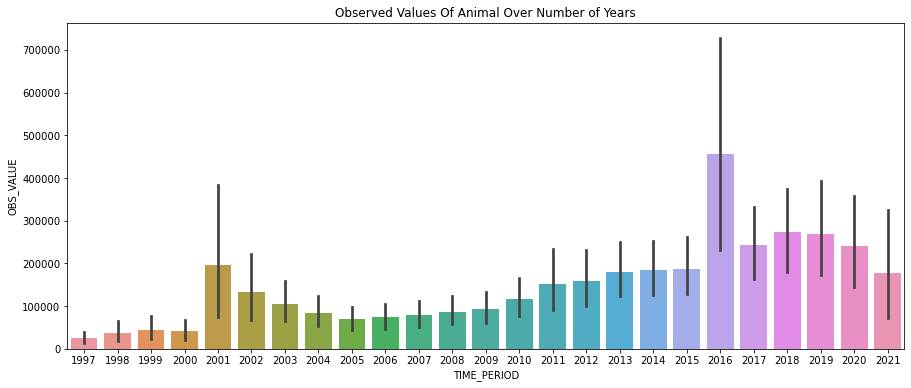

In [25]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Observed Values Of Animal Over Number of Years")
ax=sns.barplot(x="TIME_PERIOD", y="OBS_VALUE", data=df )

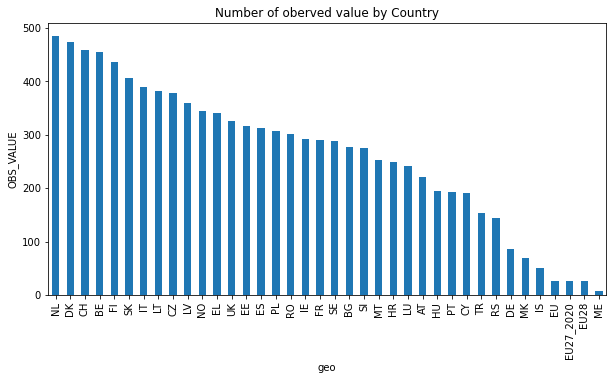

In [26]:
df.geo.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))
plt.title("Number of oberved value by Country")
plt.ylabel("OBS_VALUE")
plt.xlabel("geo");


## Subsetting Data

In [27]:
df['geo'] == 'IE'

0        False
1        False
2        False
3        False
4        False
         ...  
10029    False
10030    False
10031    False
10032    False
10033    False
Name: geo, Length: 10034, dtype: bool

In [28]:
df_Ireland = df[df['geo'] == 'IE']

In [29]:
df_Ireland.head(2)

DATAFLOW        LAST UPDATE freq animals unit geo  \
100  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  IE   
101  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  IE   

     TIME_PERIOD  OBS_VALUE  Country_code  Animal_code  
100         2012        542            18            2  
101         2013        138            18            2

In [30]:
df_France = df[df['geo'] == 'FR']

In [31]:
df_France.head(2)

DATAFLOW        LAST UPDATE freq animals unit geo  \
81  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  FR   
82  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  FR   

    TIME_PERIOD  OBS_VALUE  Country_code  Animal_code  
81         2012       2131            15            2  
82         2013       3939            15            2

In [32]:
df_Sweden = df[df['geo'] == 'SE']

In [33]:
df_Sweden.head(2)

DATAFLOW        LAST UPDATE freq animals unit geo  \
502  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A2000   HD  SE   
503  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A2000   HD  SE   

     TIME_PERIOD  OBS_VALUE  Country_code  Animal_code  
502         2012     282026            33            3  
503         2013     285670            33            3

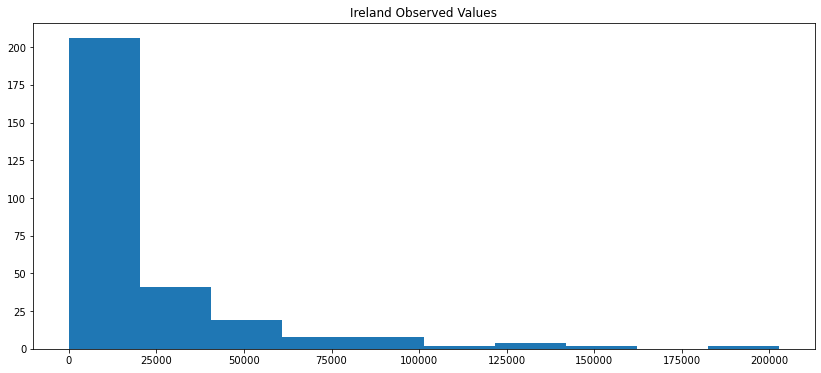

In [34]:
import matplotlib
from matplotlib import pyplot
%matplotlib inline
pyplot.figure(figsize=(14,6))
plt.title('Ireland Observed Values')
pyplot.hist(df_Ireland['OBS_VALUE'])
pyplot.show()

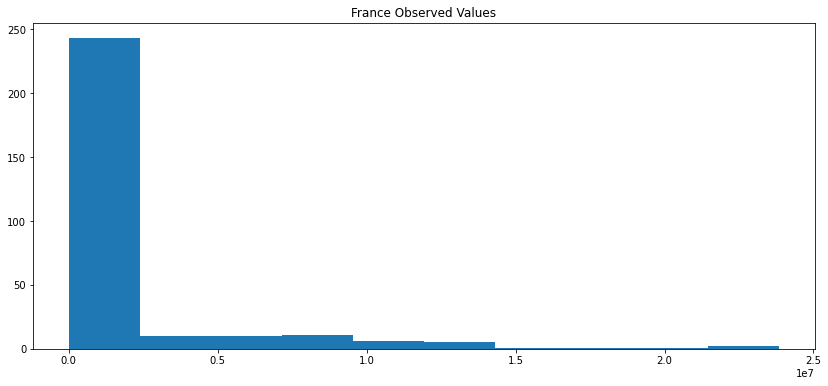

In [35]:
import matplotlib
from matplotlib import pyplot
%matplotlib inline
pyplot.figure(figsize=(14,6))
plt.title('France Observed Values')
pyplot.hist(df_France['OBS_VALUE'])
pyplot.show()

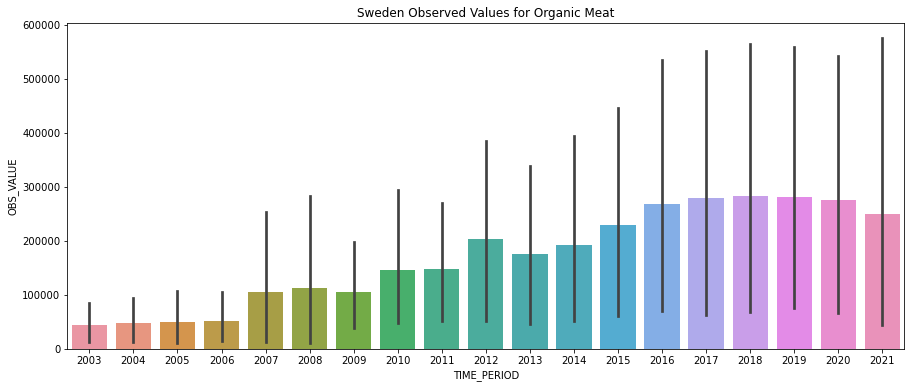

In [36]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title('Sweden Observed Values for Organic Meat')
ax=sns.barplot(x="TIME_PERIOD", y="OBS_VALUE", data=df_Sweden )

In [37]:
df_Ireland.describe()

TIME_PERIOD      OBS_VALUE  Country_code  Animal_code
count   292.000000     292.000000         292.0   292.000000
mean   2012.047945   19625.143836          18.0    21.075342
std       5.202210   32728.592604           0.0    10.249523
min    2005.000000       0.000000          18.0     0.000000
25%    2007.000000     340.250000          18.0    14.750000
50%    2012.000000    4000.000000          18.0    22.000000
75%    2017.000000   25198.750000          18.0    29.000000
max    2021.000000  202748.000000          18.0    41.000000

In [38]:
df_Ireland.corr()

TIME_PERIOD  OBS_VALUE  Country_code  Animal_code
TIME_PERIOD      1.000000   0.218936           NaN     0.152998
OBS_VALUE        0.218936   1.000000           NaN     0.173148
Country_code          NaN        NaN           NaN          NaN
Animal_code      0.152998   0.173148           NaN     1.000000

<AxesSubplot:>

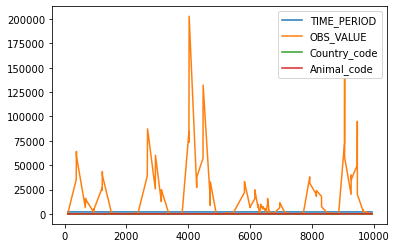

In [39]:
df_Ireland.plot()

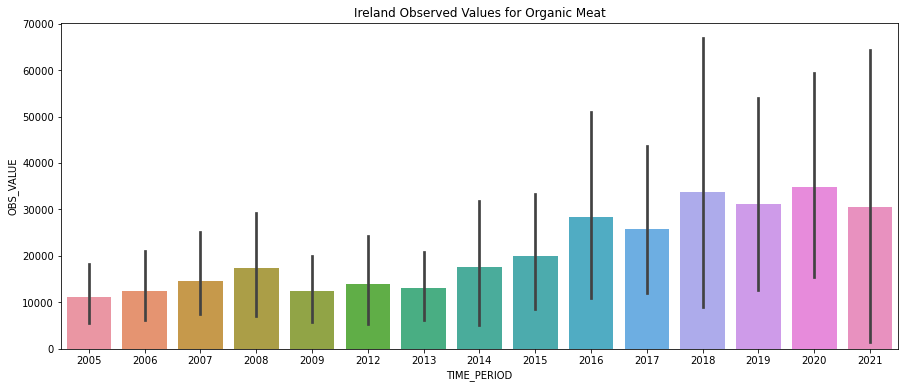

In [40]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title('Ireland Observed Values for Organic Meat')
ax=sns.barplot(x="TIME_PERIOD", y="OBS_VALUE", data=df_Ireland )

Text(0, 0.5, 'PM2.5 (µg/m3)')

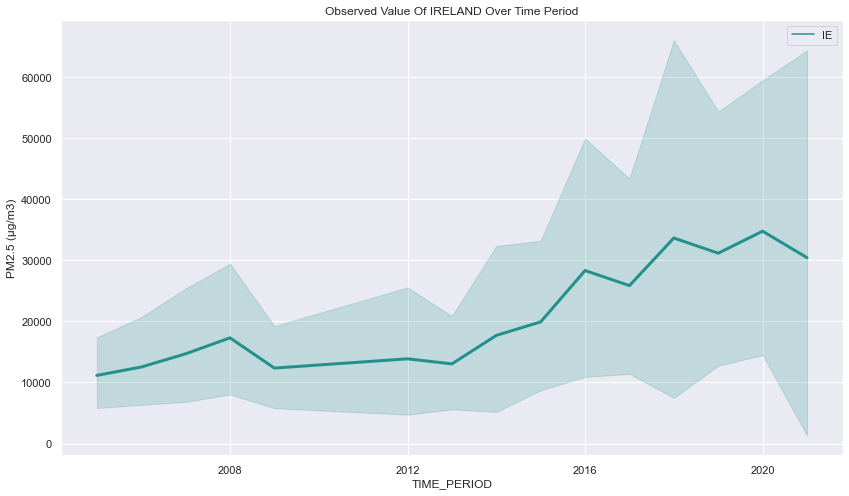

In [41]:
from matplotlib.axis import Axis
import matplotlib.ticker as ticker
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_Ireland, x ='TIME_PERIOD', y = 'OBS_VALUE',
                  hue='geo', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Observed Value Of IRELAND Over Time Period')
plt.ylabel('PM2.5 (µg/m3)')

In [42]:
df_France.corr()

TIME_PERIOD  OBS_VALUE  Country_code  Animal_code
TIME_PERIOD      1.000000   0.136330           NaN    -0.064782
OBS_VALUE        0.136330   1.000000           NaN     0.339516
Country_code          NaN        NaN           NaN          NaN
Animal_code     -0.064782   0.339516           NaN     1.000000

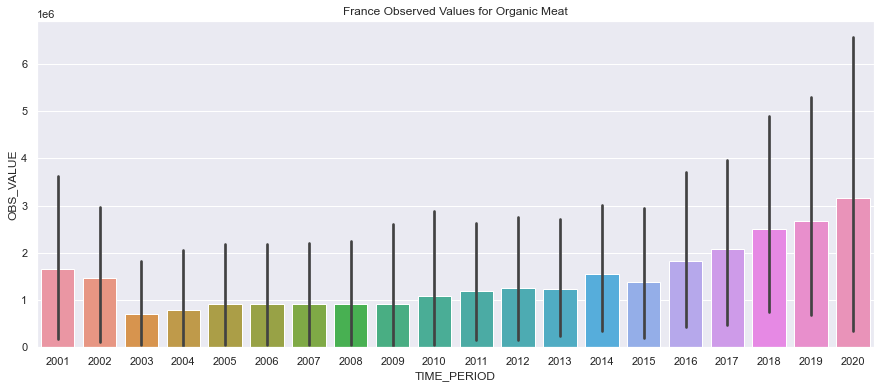

In [43]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title('France Observed Values for Organic Meat')
ax=sns.barplot(x="TIME_PERIOD", y="OBS_VALUE", data=df_France )

In [44]:
df_Sweden.corr()

TIME_PERIOD  OBS_VALUE  Country_code  Animal_code
TIME_PERIOD      1.000000   0.281712           NaN    -0.026328
OBS_VALUE        0.281712   1.000000           NaN     0.245044
Country_code          NaN        NaN           NaN          NaN
Animal_code     -0.026328   0.245044           NaN     1.000000

Text(0, 0.5, 'PM2.5 (µg/m3)')

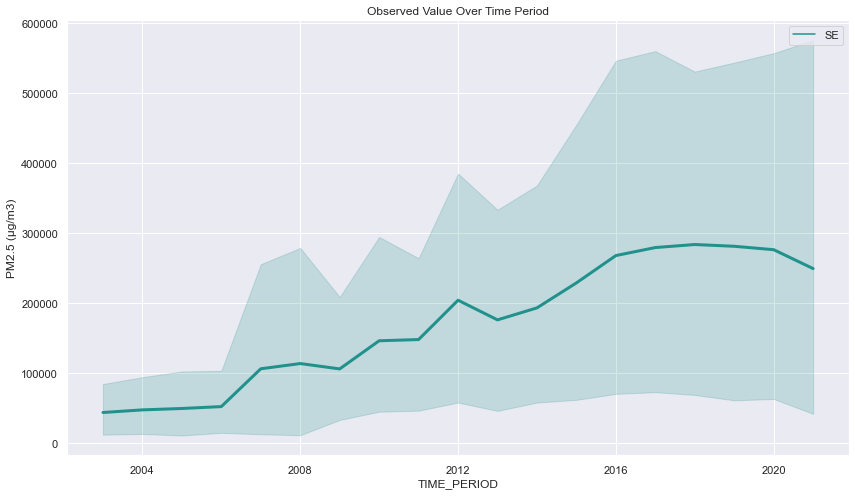

In [45]:
from matplotlib.axis import Axis
import matplotlib.ticker as ticker
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_Sweden, x ='TIME_PERIOD', y = 'OBS_VALUE',
                  hue='geo', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Observed Value Over Time Period')
plt.ylabel('PM2.5 (µg/m3)')


In [46]:
output_notebook()

Loading BokehJS ...

In [47]:
df['geo'].unique()

array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI',
       'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'MK', 'MT',
       'NO', 'PL', 'PT', 'RO', 'RS', 'SI', 'SK', 'TR', 'UK', 'EL', 'EU',
       'EU27_2020', 'EU28', 'ME', 'NL', 'SE'], dtype=object)

In [48]:
df = df.loc[~(df['geo'] == 'EU27_2020')]
df = df.loc[~(df['geo'] == 'EU28')]
df = df.loc[~(df['geo'] == 'UK')]
df = df.loc[~(df['geo'] == 'EL')]
df=df.loc[~(df['geo']=='EU')]

In [49]:
# Create an empty list to store the country names
country_names = []

# Loop through the 'Country' column
for code in df["geo"]:
    
    # Get the full country name using the pycountry library
    country = pycountry.countries.get(alpha_2=code)
    country_name = country.name
    # Append the country name to the list
    country_names.append(country_name)

In [50]:
  # Add the 'Country Name' column to the DataFrame
df["country_name"]=country_names

In [51]:
df.head(2)

DATAFLOW        LAST UPDATE freq animals unit geo  \
0  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
1  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   

   TIME_PERIOD  OBS_VALUE  Country_code  Animal_code country_name  
0         2015      15697             0            2      Austria  
1         2016      18161             0            2      Austria

In [52]:
df_2021 = df.query("TIME_PERIOD==2021")
df_2021.head()

DATAFLOW        LAST UPDATE freq animals unit geo  \
220  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A2000   HD  AT   
239  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A2000   HD  BG   
249  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A2000   HD  CH   
259  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A2000   HD  CY   
269  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A2000   HD  CZ   

     TIME_PERIOD  OBS_VALUE  Country_code  Animal_code country_name  
220         2021     420118             0            3      Austria  
239         2021      10408             2            3     Bulgaria  
249         2021     213595             3            3  Switzerland  
259         2021        837             4            3       Cyprus  
269         2021     278346             5            3      Czechia

In [53]:
import plotly.express as px

In [54]:
#converting 2 letter country code to 3 letter country code
from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3

df_2021['geo_3'] = df_2021.geo.apply(lambda x: country_name_to_country_alpha3(country_alpha2_to_country_name(x)))

In [55]:
fig = px.choropleth(df_2021,
                    locations="geo_3", 
# colunm containing all country codes
                    color="OBS_VALUE", 
# column by which to color-code
                    hover_name="country_name", # column to display in hover information
                 color_continuous_scale=px.colors.sequential.Plasma)
fig.show()


In [56]:
fig = px.choropleth(df_2021,
                    locations="geo_3",
                    color="OBS_VALUE", 
                    # column by which to color-code
                    hover_name="country_name", 
                    # column to display in hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    # add a title text for the plot
    title_text = 'Observed Value per animal by Countries',
    geo_scope = 'europe' 
# can be set to north america | south america | africa | asia | europe | usa
)
fig.show()


In [57]:
fig = px.choropleth(df_2021, locations ="geo_3", 
                    
                color ="OBS_VALUE", 
                    hover_name= "country_name", 
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
                   title_text="Observed Value per animal by Countries",
                geo=dict(projection={"type": "natural earth"})
)
fig.show()

In [58]:
#converting 2 letter country code to 3 letter country code
df['geo_3'] = df.geo.apply(lambda x: country_name_to_country_alpha3(country_alpha2_to_country_name(x)))

In [59]:
fig = px.choropleth(df,
                locations ="geo_3", 
                color ="OBS_VALUE", 
                hover_name= "country_name", 
                animation_frame="TIME_PERIOD",
                color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
                   title_text="Observed Value per animal by Countries",
                geo=dict(projection={"type": "natural earth"})
)
fig.show()

In [60]:
df_2021.sort_values(by=["TIME_PERIOD"],inplace=True)
df_2021.head()

DATAFLOW        LAST UPDATE freq animals unit geo  \
220   ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A2000   HD  AT   
3257  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4200   HD  BG   
3238  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4200   HD  AT   
3042  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A  A4110K   HD  SE   
3041  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A  A4110K   HD  RO   

      TIME_PERIOD  OBS_VALUE  Country_code  Animal_code country_name geo_3  
220          2021     420118             0            3      Austria   AUT  
3257         2021       8108             2           28     Bulgaria   BGR  
3238         2021      52879             0           28      Austria   AUT  
3042         2021      49988            33           26       Sweden   SWE  
3041         2021      10978            31           26      Romania   ROU

In [61]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas

%matplotlib inline

def mpl_plot(avg, highlight):
    fig = Figure()
    FigureCanvas(fig) # not needed in mpl >= 3.1
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='OBS_VALUE', window=30, sigma=10, view_fn=mpl_plot):
    avg = df[variable].rolling(window=window).mean()
    residual = df[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

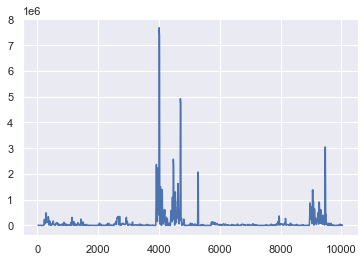

In [62]:
find_outliers(variable='OBS_VALUE', window=20, sigma=10)

Traceback (most recent call last):
 File "C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
 return self._engine.get_loc(casted_key)
 File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
 File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
 File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
 File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'OBS_VALUE'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
 File "C:\Users\Dell\anaconda3\lib\site-packages\pyviz_comms\__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "C:\Users\Dell\anaconda3\lib\site-packages\panel\viewable.py", line 274, in _on_msg
 doc.unhold()
 File "C:\Users\Dell\anaconda3\lib\site-packages\bokeh\document\document.py", line 799, in unhold
 self.callbacks.unhold()
 File "C:\Users\Dell\anaconda3\lib\site-packages\bokeh\document\callbacks.py", line 396, in unhold
 self.trigger_on_change(event)
 File "C:\Users\Dell\anaconda3\lib\site-packages\bokeh\document\callbacks.py", line 373, in trigger_on_change
 invoke_with_curdoc(doc, event.callback_invoker)
 File "C:\Users\Dell\anaconda3\lib\site-packages\bokeh\document\callbacks.py", line 408, in invoke_with_curdoc
 return f()
 File "C:\Users\Dell\anaconda3\lib\site-packages\bokeh\util\callback_manager.py", line 191, in invoke
 callback(attr, old, new)
 File "C:\Users\Dell\anaconda3\lib\site-packages\panel\reactive.py", line 350, in _comm_change
 self._schedule_change(doc, comm)
 File "C:\Users\Dell\anaconda3\lib\site-packages\panel\reactive.py", line 337, in _schedule_change
 self._change_event(doc)
 File "C:\Users\Dell\anaconda3\lib\site-packages\panel\reactive.py", line 331, in _change_event
 self._process_events(events)
 File "C:\Users\Dell\anaconda3\lib\site-packages\panel\reactive.py", line 276, in _process_events
 self.param.update(**self_events)
 File "C:\Users\Dell\anaconda3\lib\site-packages\param\parameterized.py", line 1877, in update
 self_._batch_call_watchers()
 File "C:\Users\Dell\anaconda3\lib\site-packages\param\parameterized.py", line 2038, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "C:\Users\Dell\anaconda3\lib\site-packages\param\parameterized.py", line 2000, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "C:\Users\Dell\anaconda3\lib\site-packages\panel\interact.py", line 188, in update_pane
 new_object = self.object(**self.kwargs)
 File "C:\Users\Dell\AppData\Local\Temp\ipykernel_31644\4085096430.py", line 15, in find_outliers
 avg = df[variable].rolling(window=window).mean()
 File "C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py", line 3505, in __getitem__
 indexer = self.columns.get_loc(key)
 File "C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3623, in get_loc
 raise KeyError(key) from err
KeyError: 'OBS_VALUE'
 


 Traceback (most recent call last):
 File "C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
 return self._engine.get_loc(casted_key)
 File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
 File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
 File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
 File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'OBS_VALUE'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
 File "C:\Users\Dell\anaconda3\lib\site-packages\pyviz_comms\__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "C:\Users\Dell\anaconda3\lib\site-packages\panel\viewable.py", line 274, in _on_msg
 doc.unhold

Column
    [0] Column
        [0] IntSlider(end=90, name='window', start=-30, value=30)
        [1] IntSlider(end=30, name='sigma', start=-10, value=10)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00101')
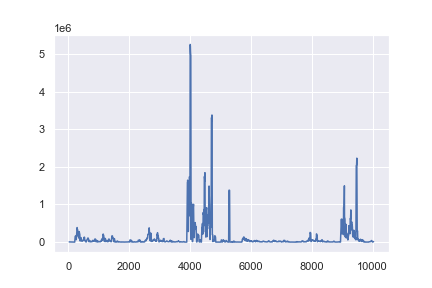

In [63]:
import panel as pn
pn.extension()

pn.interact(find_outliers)

Text(0, 0.5, 'PM2.5 (µg/m3)')

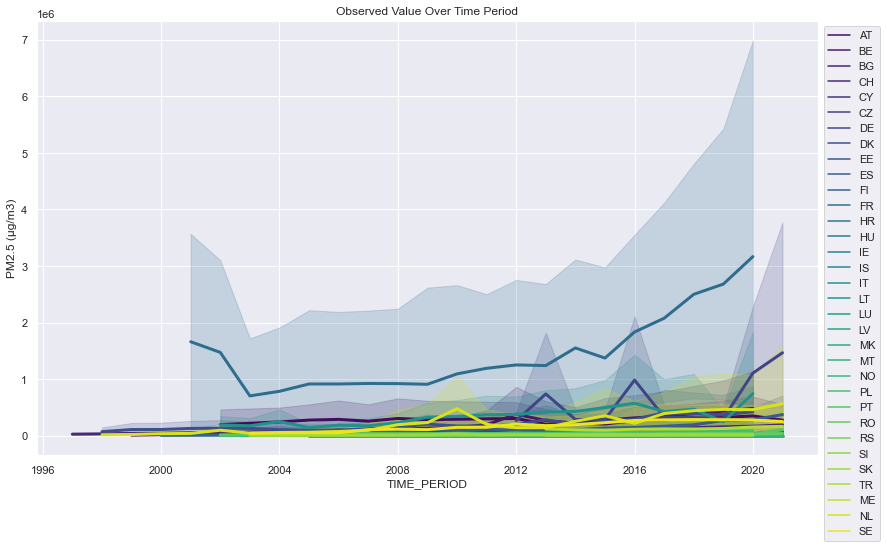

In [64]:
from matplotlib.axis import Axis
import matplotlib.ticker as ticker
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df, x ='TIME_PERIOD', y = 'OBS_VALUE',
                  hue='geo', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Observed Value Over Time Period')
plt.ylabel('PM2.5 (µg/m3)')


In [65]:
figure = px.bar(df, 
                x=df["TIME_PERIOD"], 
                y = df["OBS_VALUE"], 
                color = df["country_name"],
                title="Observed Values of Countries With Number of Years")
figure.show()

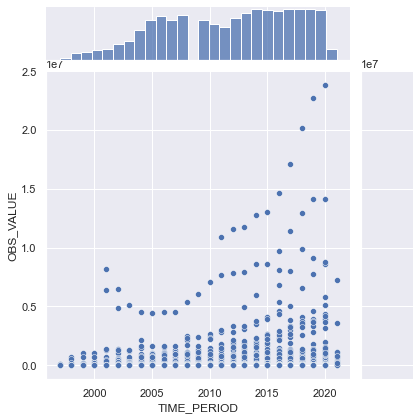

In [66]:
sns.jointplot(x='TIME_PERIOD', y='OBS_VALUE', data=df);

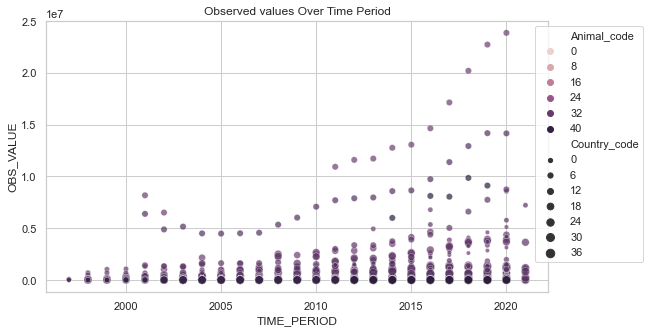

In [67]:
sns.set_style('whitegrid')
# Plot
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df, x='TIME_PERIOD', y='OBS_VALUE', alpha=0.7, hue='Animal_code', size='Country_code')
plt.title("Observed values Over Time Period")
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1));

<AxesSubplot:>

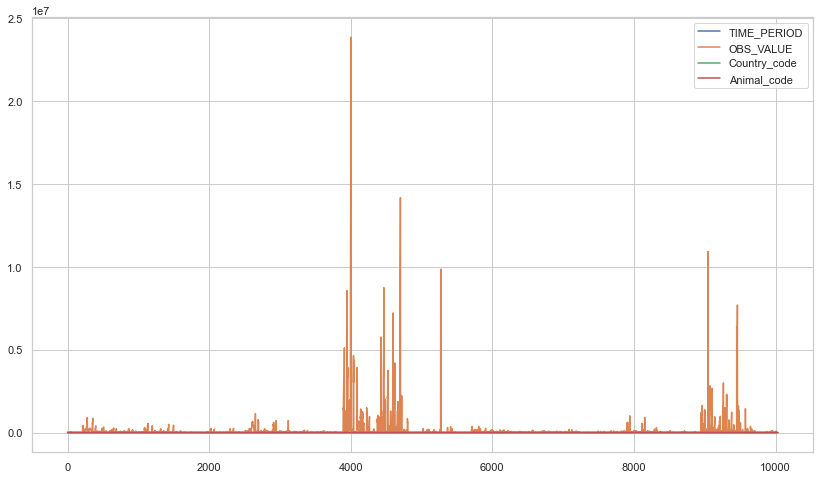

In [68]:
df.plot()

Text(0.5, 1.0, 'Observed Values Density')

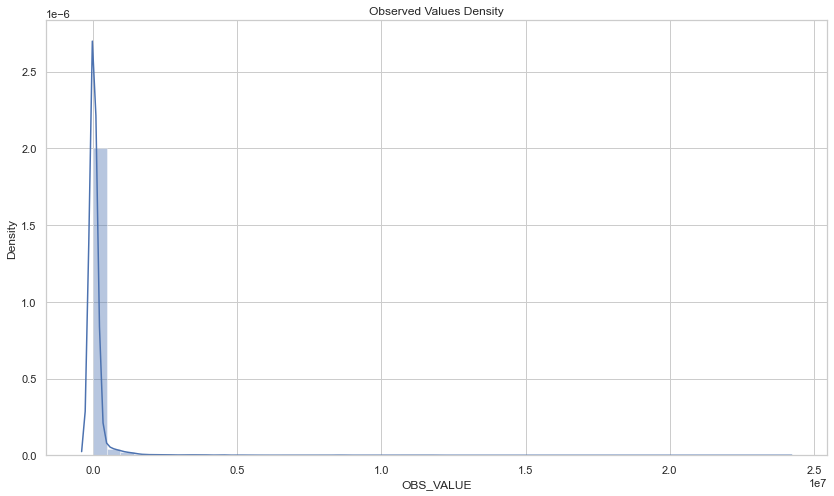

In [69]:
import seaborn as sns
sns.distplot(df["OBS_VALUE"]);
plt.title('Observed Values Density')

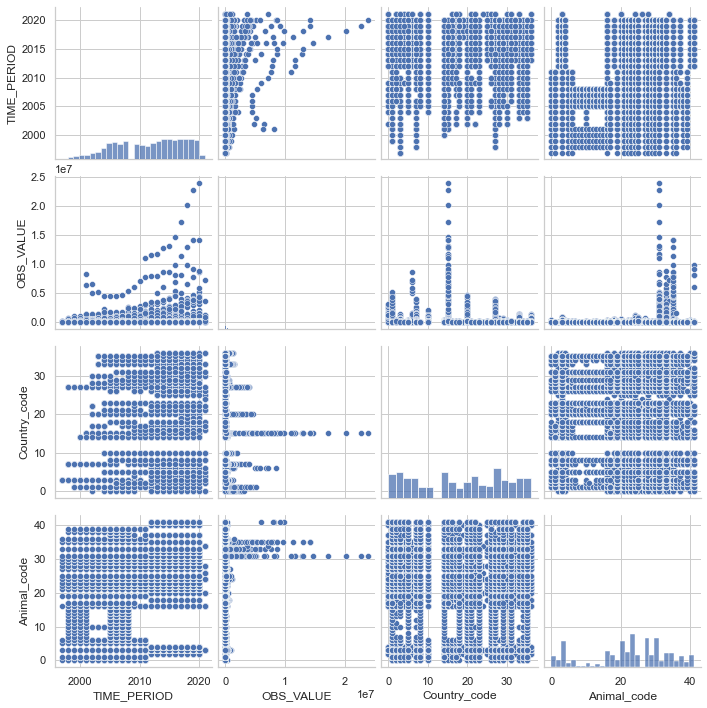

In [70]:
import seaborn as sns
sns.pairplot(df)

Text(0.5, 1.0, 'Observed values by Country')

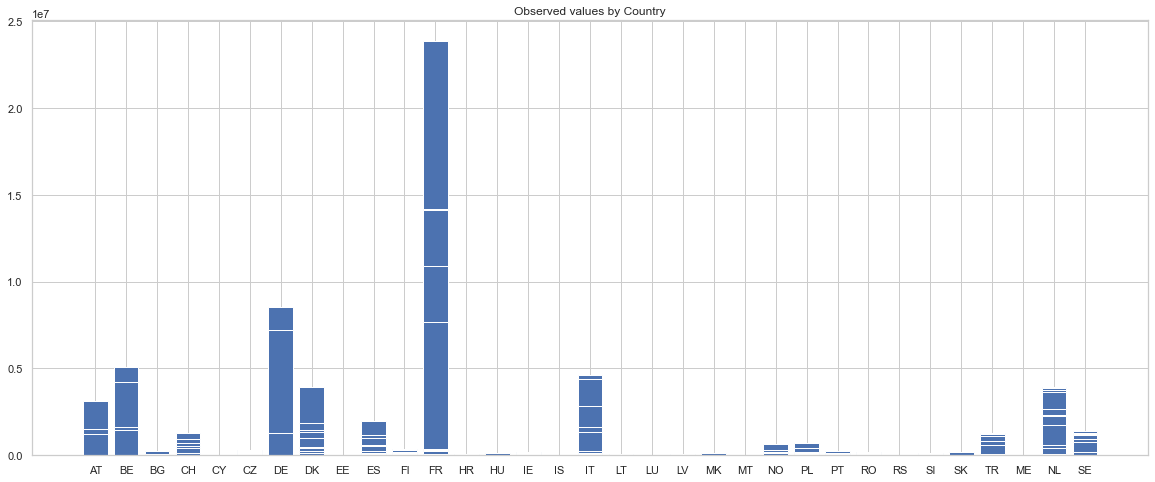

In [71]:
fig, b = plt.subplots(figsize=(20,8))
b = plt.bar(df['geo'], df['OBS_VALUE'])
plt.title('Observed values by Country')

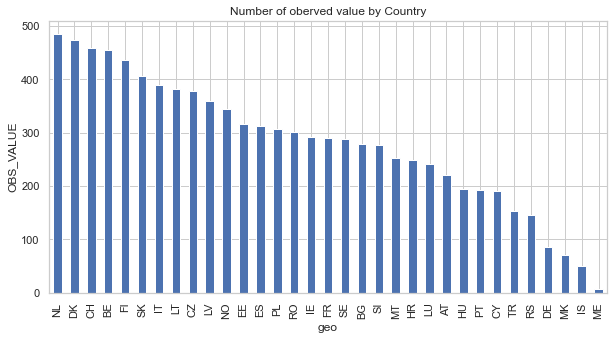

In [72]:
df.geo.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))
plt.title("Number of oberved value by Country")
plt.ylabel("OBS_VALUE")
plt.xlabel("geo");

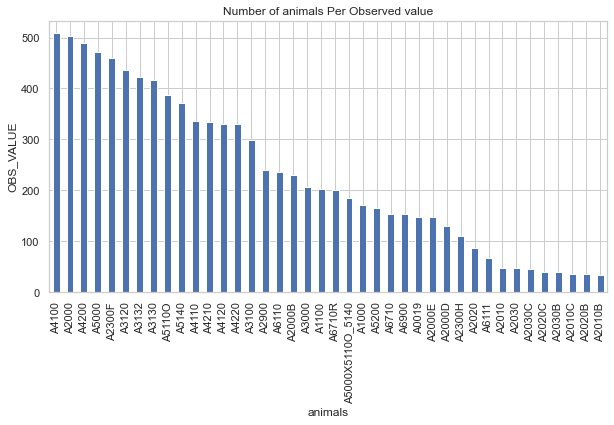

In [73]:
df.animals.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))
plt.title("Number of animals Per Observed value")
plt.ylabel("OBS_VALUE")
plt.xlabel("animals");

## Correlation Matrix

TIME_PERIOD  OBS_VALUE  Country_code  Animal_code
TIME_PERIOD      1.000000   0.063652      0.034086     0.097940
OBS_VALUE        0.063652   1.000000     -0.050535     0.109516
Country_code     0.034086  -0.050535      1.000000    -0.009050
Animal_code      0.097940   0.109516     -0.009050     1.000000

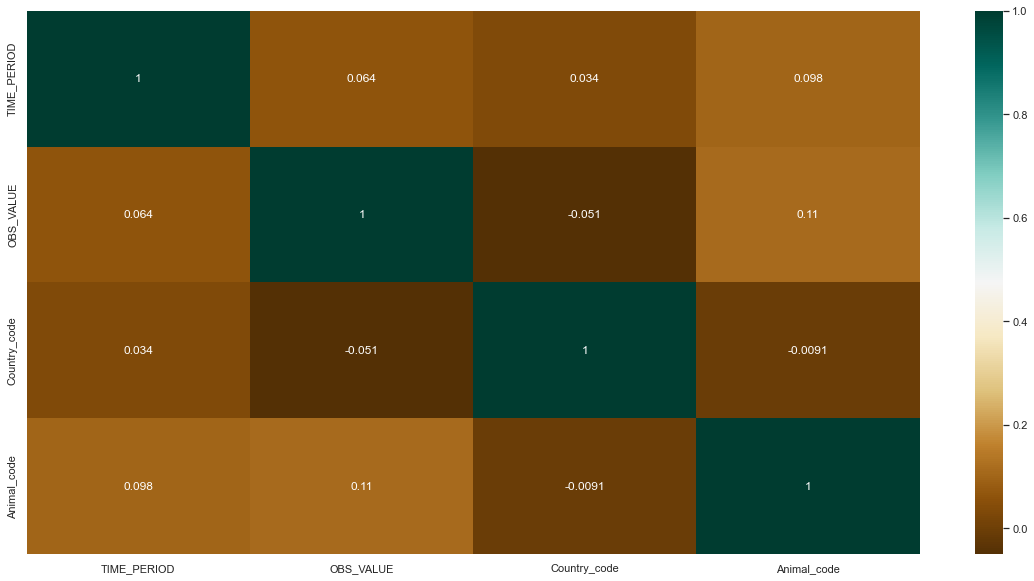

In [74]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

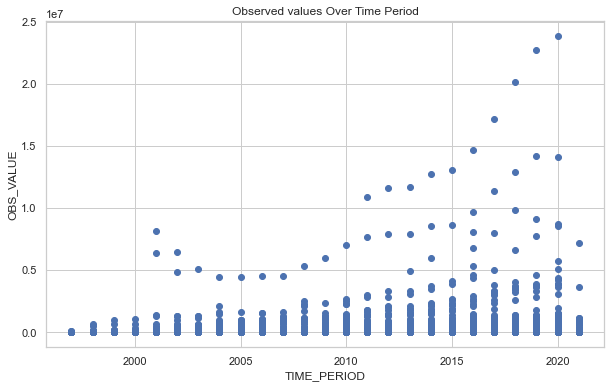

In [75]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["TIME_PERIOD"], df["OBS_VALUE"])
ax.set_xlabel("TIME_PERIOD")
ax.set_ylabel("OBS_VALUE")
plt.title("Observed values Over Time Period")
plt.show()

In [76]:
df[2839:2846]

DATAFLOW        LAST UPDATE freq animals unit geo  \
3086  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4120   HD  CZ   
3087  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4120   HD  CZ   
3088  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4120   HD  DE   
3089  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4120   HD  DE   
3090  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4120   HD  DK   
3091  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4120   HD  DK   
3092  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4120   HD  DK   

      TIME_PERIOD  OBS_VALUE  Country_code  Animal_code country_name geo_3  
3086         2019      27896             5           27      Czechia   CZE  
3087         2020      24211             5           27      Czechia   CZE  
3088         2016      84656             6           27      Germany   DEU  
3089         2020      94758             6           27      Germany   DEU  
3090         2012        124             7           27      Denmark   DNK  
3091         2014        111             7           27      Denmark   DNK  
3092         2015        124             7           27      Denmark   DNK

Text(0.5, 1.0, 'Number Of lambs,Ewes')

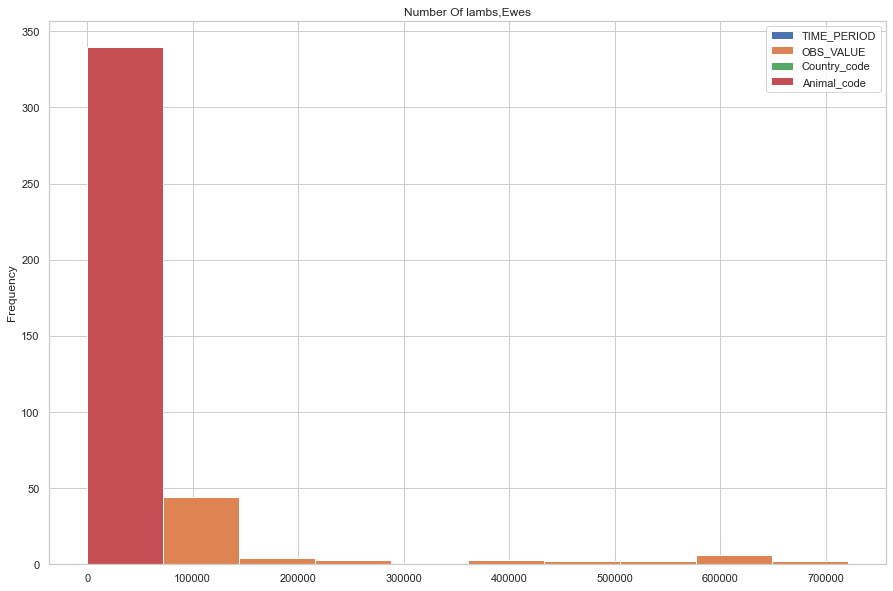

In [77]:
df[2508:2848].plot(kind='hist', figsize=(15,10))
plt.title('Number Of lambs,Ewes')

In [78]:
df.describe()

TIME_PERIOD     OBS_VALUE  Country_code  Animal_code
count  9287.000000  9.287000e+03   9287.000000  9287.000000
mean   2011.661355  1.295525e+05     17.924518    22.413374
std       5.780201  7.989541e+05     11.222152    11.099311
min    1997.000000  0.000000e+00      0.000000     0.000000
25%    2007.000000  5.220000e+02      7.000000    16.000000
50%    2012.000000  5.399000e+03     19.000000    24.000000
75%    2017.000000  3.390250e+04     28.000000    31.000000
max    2021.000000  2.384456e+07     36.000000    41.000000

In [79]:
df_animals=df[['animals','OBS_VALUE']].groupby('animals').mean()
df_animals

OBS_VALUE
animals                       
A0019             8.698304e+03
A1000             1.877807e+03
A1100             2.618034e+03
A2000             1.057391e+05
A2000B            3.396542e+04
A2000D            1.833844e+04
A2000E            2.729184e+04
A2010             1.376471e+04
A2010B            5.929441e+03
A2010C            7.514389e+03
A2020             1.727467e+04
A2020B            4.031806e+03
A2020C            7.533625e+03
A2030             2.948949e+04
A2030B            3.544375e+03
A2030C            4.562435e+03
A2300F            2.661799e+04
A2300H            1.639981e+04
A2900             6.945014e+04
A3000             1.904134e+04
A3100             3.613864e+04
A3120             1.878142e+03
A3130             1.035048e+04
A3132             1.585445e+04
A4100             9.373941e+04
A4110             7.297288e+04
A4110K            2.202000e+04
A4120             2.809639e+04
A4200             1.342700e+04
A4210             1.077156e+04
A4220             4.215798e+03
A5000             9.436979e+05
A5000X5110O_5140  9.333464e+04
A5110O            5.249173e+05
A5110OH           1.002618e+06
A5140             6.475453e+05
A5200             3.488776e+04
A6110             1.420292e+03
A6111             2.165672e+02
A6710             1.583145e+04
A6710R            2.977821e+04
A6900             2.697575e+05

In [80]:
df_animals=df[['animals','OBS_VALUE']].groupby('animals').max()
df_animals

OBS_VALUE
animals                    
A0019                350052
A1000                  9943
A1100                 41862
A2000                896760
A2000B               272153
A2000D               172921
A2000E               161167
A2010                 74755
A2010B                48749
A2010C                32351
A2020                 70879
A2020B                25560
A2020C                61168
A2030                139088
A2030B                27047
A2030C                31757
A2300F               240630
A2300H                84180
A2900                549647
A3000                185828
A3100                490924
A3120                 22106
A3130                248376
A3132                253316
A4100               1132809
A4110                912175
A4110K                61746
A4120                727512
A4200                140278
A4210                 95116
A4220                 55956
A5000              23844564
A5000X5110O_5140    1492674
A5110O              8733652
A5110OH             7211257
A5140              14165410
A5200               1439725
A6110                 10853
A6111                  1377
A6710                113932
A6710R               250434
A6900               9846460

<AxesSubplot:xlabel='animals'>

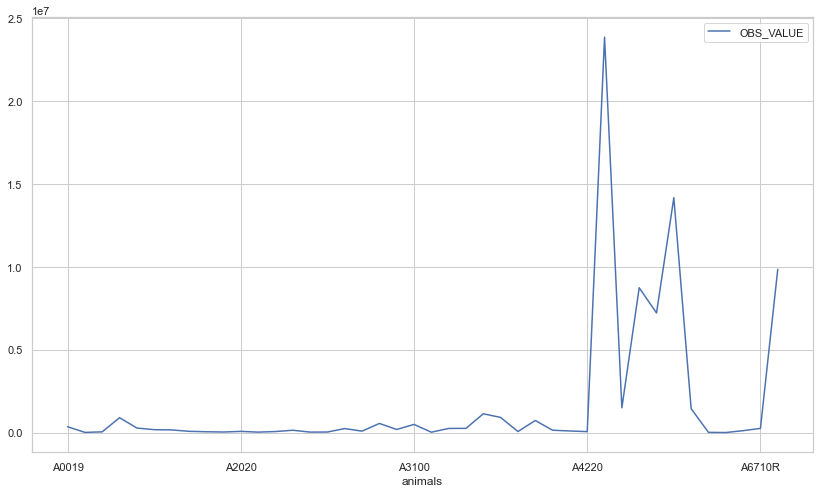

In [81]:
df_animals.plot()

In [82]:
df_geo=df[['geo','OBS_VALUE']].groupby('geo').mean()
df_geo

OBS_VALUE
geo              
AT   2.736283e+05
BE   1.790855e+05
BG   9.181140e+03
CH   8.412057e+04
CY   2.003660e+03
CZ   2.913524e+04
DE   7.220130e+05
DK   1.977550e+05
EE   7.445244e+03
ES   1.332143e+05
FI   1.899261e+04
FR   1.635190e+06
HR   5.722936e+03
HU   1.551514e+04
IE   1.962514e+04
IS   1.663039e+03
IT   3.042621e+05
LT   5.291058e+03
LU   2.973183e+03
LV   1.326542e+04
ME   3.812857e+02
MK   1.279843e+04
MT   0.000000e+00
NL   1.742651e+05
NO   3.686559e+04
PL   3.303385e+04
PT   2.982877e+04
RO   1.627521e+04
RS   1.700345e+03
SE   1.540971e+05
SI   1.194402e+04
SK   1.258759e+04
TR   1.160730e+05

In [83]:
df_geo=df[['geo','OBS_VALUE']].groupby('geo').max()
df_geo

OBS_VALUE
geo           
AT     3134238
BE     5109020
BG      250434
CH     1298971
CY       24330
CZ      278346
DE     8562076
DK     3932411
EE       45713
ES     1965505
FI      341101
FR    23844564
HR       76308
HU      139406
IE      202748
IS       15245
IT     4636012
LT       59151
LU       38942
LV      101968
ME         987
MK      122230
MT           0
NL     3926491
NO      629539
PL      696153
PT      251762
RO      186699
RS       17880
SE     1418073
SI      104940
SK      188787
TR     1262307

In [84]:
df_gbAnimals= df.groupby('animals')['animals'].agg('count')

In [85]:
df_gbAnimals

animals
A0019               148
A1000               171
A1100               203
A2000               503
A2000B              231
A2000D              131
A2000E              148
A2010                48
A2010B               34
A2010C               36
A2020                86
A2020B               36
A2020C               40
A2030                47
A2030B               40
A2030C               46
A2300F              460
A2300H              110
A2900               240
A3000               206
A3100               298
A3120               437
A3130               417
A3132               422
A4100               508
A4110               336
A4110K                9
A4120               331
A4200               490
A4210               335
A4220               331
A5000               472
A5000X5110O_5140    186
A5110O              387
A5110OH              16
A5140               371
A5200               165
A6110               236
A6111                67
A6710               154
A6710R              201
A6900   

In [86]:
df_gbAnimal= df.groupby('animals',as_index=False)['animals'].agg('count')

In [87]:
df_gbAnimal.index

RangeIndex(start=0, stop=42, step=1)

In [88]:
df_gbAnimal

animals
0       148
1       171
2       203
3       503
4       231
5       131
6       148
7        48
8        34
9        36
10       86
11       36
12       40
13       47
14       40
15       46
16      460
17      110
18      240
19      206
20      298
21      437
22      417
23      422
24      508
25      336
26        9
27      331
28      490
29      335
30      331
31      472
32      186
33      387
34       16
35      371
36      165
37      236
38       67
39      154
40      201
41      154

### How many UNIQUE countries and Animals are there ?

In [89]:
countries = df['geo'].unique().tolist()
len(countries)

33

In [90]:
animals = df['animals'].unique().tolist()
len(animals)

42

### How many years of data do we have ?

In [91]:
years = df['TIME_PERIOD'].unique().tolist()
len(years)

25

### What's the range of years?

In [92]:
print(min(years)," to ",max(years))

1997  to  2021


In [93]:
# select A4100('Number of Sheep') for the Ireland as it is the maximum number of animal
hist_animal = 'A4100'
hist_country = 'IE'

mask1 = df['animals'].str.contains(hist_animal) 
mask2 = df['geo'].str.contains(hist_country)

org = df[mask1 & mask2]

In [94]:
org.head()

DATAFLOW        LAST UPDATE freq animals unit geo  \
2676  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4100   HD  IE   
2677  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4100   HD  IE   
2678  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4100   HD  IE   
2679  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4100   HD  IE   
2680  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4100   HD  IE   

      TIME_PERIOD  OBS_VALUE  Country_code  Animal_code country_name geo_3  
2676         2012      38952            18           24      Ireland   IRL  
2677         2013      42500            18           24      Ireland   IRL  
2678         2014      42201            18           24      Ireland   IRL  
2679         2015      51645            18           24      Ireland   IRL  
2680         2016      63650            18           24      Ireland   IRL

### Let's see how 4100(Number of Sheeps) have changed over time using MatplotLib

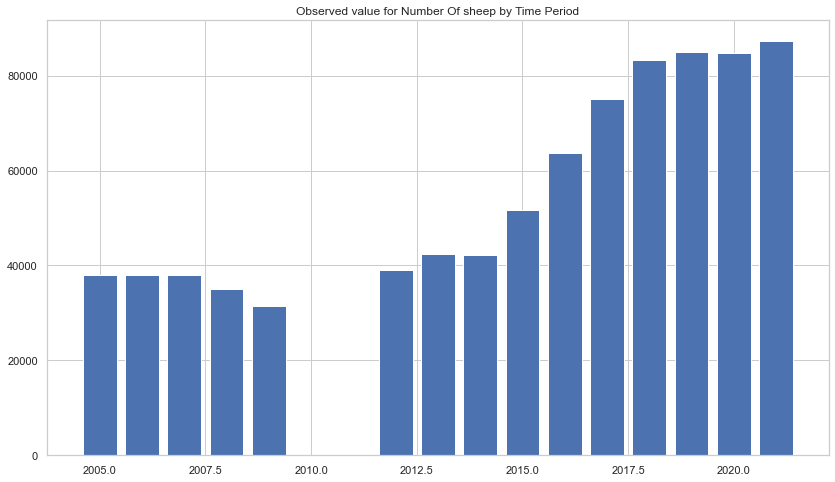

In [95]:
# get the years
years = org['TIME_PERIOD'].values
# get the values 
sheep = org['OBS_VALUE'].values

# create
plt.bar(years,sheep)
plt.title('Observed value for Number Of sheep by Time Period')
plt.show();


### But how do the Ireland numbers relate to those of other countries in 2021?

In [96]:
# select Number of sheeps for all countries in 2021
hist_animal = 'A4100'
hist_year = 2021

mask1 = df['animals'].str.contains(hist_animal) 
mask2 = df['TIME_PERIOD'].isin([hist_year])

# apply our mask
sheep_2021 = df[mask1 & mask2]
sheep_2021.head()

DATAFLOW        LAST UPDATE freq animals unit geo  \
2516  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4100   HD  AT   
2535  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4100   HD  BG   
2545  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4100   HD  CH   
2555  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4100   HD  CY   
2565  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4100   HD  CZ   

      TIME_PERIOD  OBS_VALUE  Country_code  Animal_code country_name geo_3  
2516         2021     118593             0           24      Austria   AUT  
2535         2021      19873             2           24     Bulgaria   BGR  
2545         2021      88828             3           24  Switzerland   CHE  
2555         2021       1104             4           24       Cyprus   CYP  
2565         2021      75600             5           24      Czechia   CZE

In [97]:
#For how many countries do we have Number of sheeps in our data in 2021

In [98]:
print(len(sheep_2021))

21


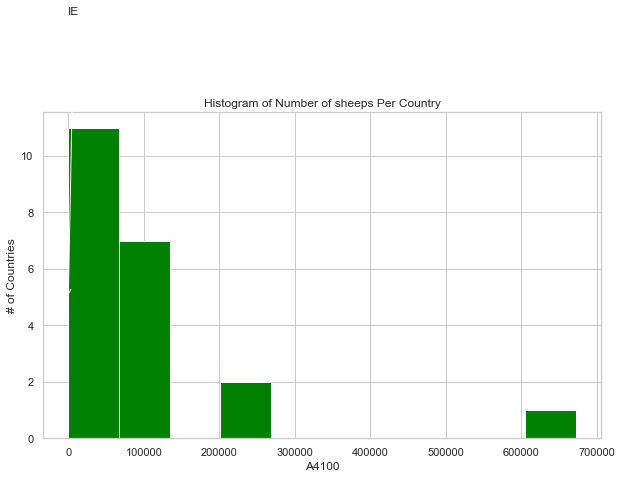

In [99]:
# let's plot a histogram of the Number of sheeps by country
# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots(figsize=(10,6))

ax.annotate("IE",
            xy=(9, 5), xycoords='data',
            xytext=(9, 15), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(sheep_2021['OBS_VALUE'], 10, density=False, facecolor='green')

plt.xlabel(org['animals'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of Number of sheeps Per Country')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

In [100]:
#So As number of sheeps are maximum number in all over the world but if we look at ireland its still quiet low in numbers

In [101]:
print("sheeps Min Year = ", org['TIME_PERIOD'].min(), "max: ", org['TIME_PERIOD'].max())

sheeps Min Year =  2005 max:  2021


In [102]:
# select A4100('Number of Sheep') for the Ireland as it is the maximum number of animal
hist_animal = 'A2000'
hist_country = 'IE'

mask1 = df['animals'].str.contains(hist_animal) 
mask2 = df['geo'].str.contains(hist_country)

bovine_org = df[mask1 & mask2]

In [103]:
bovine_org.head()

DATAFLOW        LAST UPDATE freq animals unit geo  \
376  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A2000   HD  IE   
377  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A2000   HD  IE   
378  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A2000   HD  IE   
379  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A2000   HD  IE   
380  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A2000   HD  IE   

     TIME_PERIOD  OBS_VALUE  Country_code  Animal_code country_name geo_3  
376         2012      35093            18            3      Ireland   IRL  
377         2013      37473            18            3      Ireland   IRL  
378         2014      38923            18            3      Ireland   IRL  
379         2015      46946            18            3      Ireland   IRL  
380         2016      52742            18            3      Ireland   IRL

In [104]:
org.head(2)

DATAFLOW        LAST UPDATE freq animals unit geo  \
2676  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4100   HD  IE   
2677  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A4100   HD  IE   

      TIME_PERIOD  OBS_VALUE  Country_code  Animal_code country_name geo_3  
2676         2012      38952            18           24      Ireland   IRL  
2677         2013      42500            18           24      Ireland   IRL

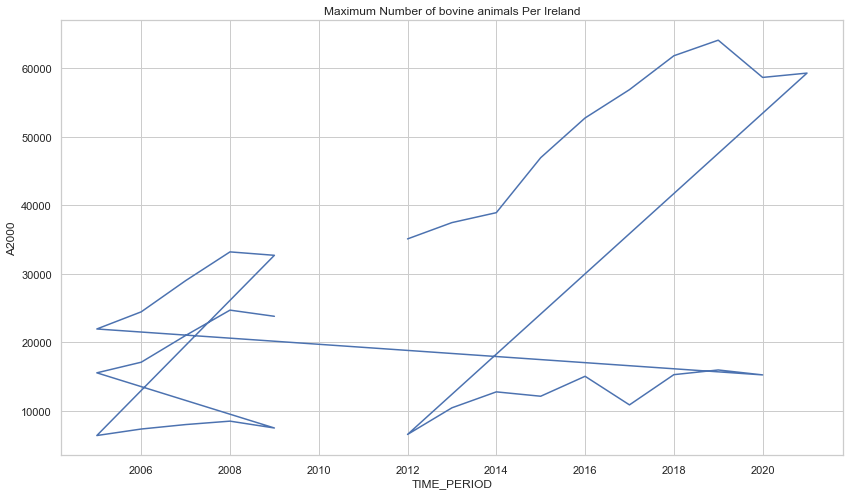

In [105]:
# switch to a line plot
plt.plot(bovine_org['TIME_PERIOD'].values, bovine_org['OBS_VALUE'].values)

# Label the axes
plt.xlabel('TIME_PERIOD')
plt.ylabel(bovine_org['animals'].iloc[0])

#label the figure
plt.title('Maximum Number of bovine animals Per Ireland')

plt.show()

Looking at the data we an see there is no clear relationship or in simple definition variables are not depending on each other. 

In [106]:
print("sheeps Min Year = ", org['TIME_PERIOD'].min(), "max: ", org['TIME_PERIOD'].max())
print("Bovine Min Year = ", org['TIME_PERIOD'].min(), "max: ", org['TIME_PERIOD'].max())

sheeps Min Year =  2005 max:  2021
Bovine Min Year =  2005 max:  2021


In [107]:
bovine_org_anim = bovine_org[bovine_org['TIME_PERIOD'] < 2012]
print(len(bovine_org_anim))
print(len(org))

15
15


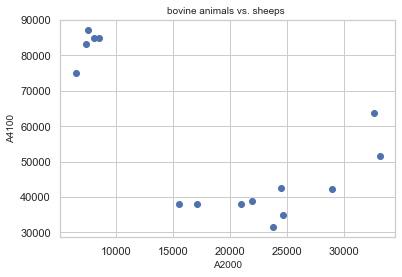

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('bovine animals vs. sheeps ',fontsize=10)
axis.set_xlabel(bovine_org_anim['animals'].iloc[0],fontsize=10)
axis.set_ylabel(org['animals'].iloc[0],fontsize=10)

X = bovine_org_anim['OBS_VALUE']
Y = org['OBS_VALUE']

axis.scatter(X, Y)
plt.show()

In [109]:
#This does not look a strong realtionship but we can find more by correlatiob

In [110]:
np.corrcoef(bovine_org_anim['OBS_VALUE'],org['OBS_VALUE'])

array([[ 1.        , -0.67602522],
       [-0.67602522,  1.        ]])

A negative correlation 0.67 is okay can not consider as weak but its inversly correlared so this means x values are getting higher with respect to y values.

# The KNN Model
After loading, analyzing and preprocessing of the data, it is now time when we feed the data into the KNN model. To do this, we  use sklearn's inbuilt function neighbors which has a class called KNeigborsClassifier in it. Let's start by importing the classifier.

In [111]:
df.head()

DATAFLOW        LAST UPDATE freq animals unit geo  \
0  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
1  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
2  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
3  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   
4  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100   HD  AT   

   TIME_PERIOD  OBS_VALUE  Country_code  Animal_code country_name geo_3  
0         2015      15697             0            2      Austria   AUT  
1         2016      18161             0            2      Austria   AUT  
2         2017      17273             0            2      Austria   AUT  
3         2018      17752             0            2      Austria   AUT  
4         2019      18678             0            2      Austria   AUT

In [112]:
df['unit'].replace('NR', 'Number', inplace = True)
df['unit'].replace('HD', 'Head', inplace = True)
df.head(5)

DATAFLOW        LAST UPDATE freq animals  unit geo  \
0  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100  Head  AT   
1  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100  Head  AT   
2  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100  Head  AT   
3  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100  Head  AT   
4  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100  Head  AT   

   TIME_PERIOD  OBS_VALUE  Country_code  Animal_code country_name geo_3  
0         2015      15697             0            2      Austria   AUT  
1         2016      18161             0            2      Austria   AUT  
2         2017      17273             0            2      Austria   AUT  
3         2018      17752             0            2      Austria   AUT  
4         2019      18678             0            2      Austria   AUT

In [113]:
df.iloc[:, [7]]

OBS_VALUE
0          15697
1          18161
2          17273
3          17752
4          18678
...          ...
10028        390
10029        345
10030        420
10031        440
10032        448

[9287 rows x 1 columns]

In [114]:
df.iloc[:,4]

0          Head
1          Head
2          Head
3          Head
4          Head
          ...  
10028    Number
10029    Number
10030    Number
10031    Number
10032    Number
Name: unit, Length: 9287, dtype: object

In [115]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label = train_test_split(df.iloc[:, [7]], 
                                                                df.iloc[:,4], test_size=0.2, random_state=42)

In [116]:
train_data.shape,train_label.shape,test_data.shape,test_label.shape

((7429, 1), (7429,), (1858, 1), (1858,))

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
neighbors = np.arange(1, 9)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))  

In [119]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(train_data, train_label)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)  
    

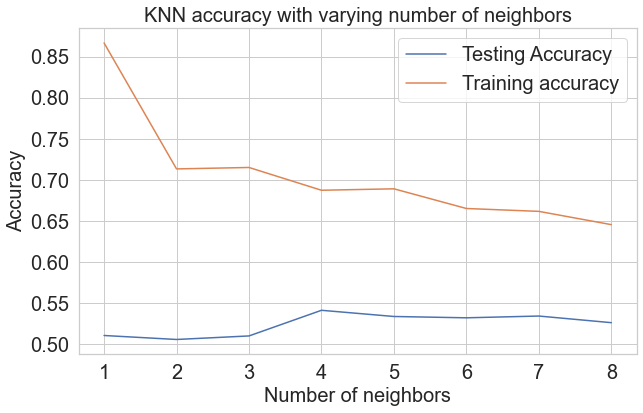

In [120]:
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [121]:
# Declare and initialise an object 'KNeighborsClassifier' with 3 neighbors
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the model
knn.fit(train_data, train_label)

# Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

# Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)

In [122]:
print(test_accuracy)

0.5102260495156081


In [123]:
# import library for confusion matrix
from sklearn.metrics import confusion_matrix

# Predict the results by calling a method 'predict()'
prediction = knn.predict(test_data)

# Display the confusion matrix
confusion_matrix(test_label, prediction)

array([[467, 509],
       [401, 481]], dtype=int64)

## Grid Search Cv for KNN

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
knn_pipe = Pipeline([('mms', MinMaxScaler()), ('knn', KNeighborsClassifier())])
params = [{'knn__n_neighbors': [3, 5, 7, 9],'knn__weights': ['uniform', 'distance'],'knn__leaf_size': [15, 20]}]
gs_knn = GridSearchCV(knn_pipe, param_grid=params, scoring='accuracy',cv=5)
gs_knn.fit(test_data, test_label)
gs_knn.best_params_
Output:{'knn__leaf_size': 15, 'knn__n_neighbors': 5, 'knn__weights': 'distance'}
# find best model score
gs_knn.score(test_data, test_label)

0.6733046286329386

## Naive Bayes and Support Vector Machine

In [125]:
df.head(2)

DATAFLOW        LAST UPDATE freq animals  unit geo  \
0  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100  Head  AT   
1  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100  Head  AT   

   TIME_PERIOD  OBS_VALUE  Country_code  Animal_code country_name geo_3  
0         2015      15697             0            2      Austria   AUT  
1         2016      18161             0            2      Austria   AUT

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9287 entries, 0 to 10032
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATAFLOW      9287 non-null   object
 1   LAST UPDATE   9287 non-null   object
 2   freq          9287 non-null   object
 3   animals       9287 non-null   object
 4   unit          9287 non-null   object
 5   geo           9287 non-null   object
 6   TIME_PERIOD   9287 non-null   int64 
 7   OBS_VALUE     9287 non-null   int64 
 8   Country_code  9287 non-null   int32 
 9   Animal_code   9287 non-null   int32 
 10  country_name  9287 non-null   object
 11  geo_3         9287 non-null   object
dtypes: int32(2), int64(2), object(8)
memory usage: 1.1+ MB


In [127]:
df.iloc[:, [7,8, 9]]

OBS_VALUE  Country_code  Animal_code
0          15697             0            2
1          18161             0            2
2          17273             0            2
3          17752             0            2
4          18678             0            2
...          ...           ...          ...
10028        390            35           39
10029        345            35           39
10030        420            35           39
10031        440            35           39
10032        448            35           39

[9287 rows x 3 columns]

In [128]:
df.iloc[:,4]

0          Head
1          Head
2          Head
3          Head
4          Head
          ...  
10028    Number
10029    Number
10030    Number
10031    Number
10032    Number
Name: unit, Length: 9287, dtype: object

In [129]:
# Spliting the dataset into independent and dependent variables
X = df.iloc[:, [7,8, 9]].values
y = df['unit'].values
# print(X, y)

In [130]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

# Display the rows and coulmns of X, y, X_train, y_train, X_test, y_test
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9287, 3), (9287,), (7429, 3), (7429,), (1858, 3), (1858,))

In [131]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler

# Create and initialise an object sc by calling a method StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transforms the test data
X_test = sc.transform(X_test)

In [132]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB

# Create and initialise an object sc by calling a method GaussianNB()
nvclassifier = GaussianNB()

# Train the model by calling a method fit()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [133]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)

# Display the predicted values
print(y_pred)

['Number' 'Number' 'Number' ... 'Number' 'Number' 'Number']


In [134]:
# Check the actual and predicted value side by side
y_compare = np.vstack((y_test, y_pred)).T
# actual value on the left side and predicted value on the right hand side
# printing the top 10 values
y_compare[:10, :]

array([['Head', 'Number'],
       ['Number', 'Number'],
       ['Number', 'Number'],
       ['Number', 'Number'],
       ['Head', 'Number'],
       ['Head', 'Number'],
       ['Head', 'Number'],
       ['Head', 'Number'],
       ['Number', 'Number'],
       ['Number', 'Number']], dtype=object)

In [135]:
# Construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 45 958]
 [ 26 829]]


In [136]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.4703982777179763
Accuracy: 0.47


# Use Of Cross Validation

In [137]:
from sklearn.model_selection import cross_val_score
nvclassifier = GaussianNB()
cross_val_score(nvclassifier, X, y, scoring='accuracy', cv = 20).mean()

0.49295397664071194

              precision    recall  f1-score   support

        Head       0.62      0.76      0.68      1003
      Number       0.62      0.46      0.53       855

    accuracy                           0.62      1858
   macro avg       0.62      0.61      0.61      1858
weighted avg       0.62      0.62      0.61      1858



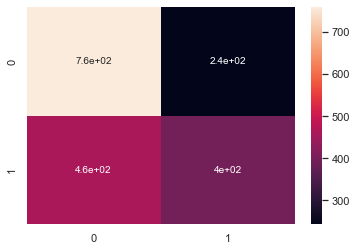

In [138]:
#normalized scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()
X_train_scaled = n_scaler.fit_transform(X_train.astype(np.float))
X_test_scaled = n_scaler.transform(X_test.astype(np.float))

#Support Vector Classification model -  apply on scaled data
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_predict_scaled = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))

# GridSearchCV

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.537 total time=   1.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.530 total time=   1.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.536 total time=   2.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.536 total time=   1.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   1.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.514 total time=   1.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.514 total time=   1.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.514 total time=   1.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.514 total time=   1.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.514 total time=   1.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.514 total time=   1.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.592 total time=   4.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.610 total time=   3.4s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.594 total time=   3.7s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.605 total time=   3.6s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.577 total time=   2.6s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.556 total time=   2.5s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.579 total time=   2.3s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.567 total time=   2.3s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.559 total time=   2.3s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.528 total time=   2.2s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.516 total time=   2.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.520 total time=   2.0s
[CV 4/5] END ....C=1000, gam

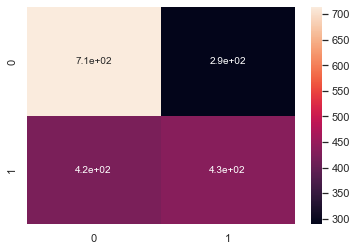

In [139]:
#find best hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,verbose = 4)
grid.fit(X_train_scaled,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test_scaled)
cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))

In [140]:
df.head(2)

DATAFLOW        LAST UPDATE freq animals  unit geo  \
0  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100  Head  AT   
1  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100  Head  AT   

   TIME_PERIOD  OBS_VALUE  Country_code  Animal_code country_name geo_3  
0         2015      15697             0            2      Austria   AUT  
1         2016      18161             0            2      Austria   AUT

In [141]:
df['unit'].replace('Head', '0', inplace = True)
df['unit'].replace('Number', '1', inplace = True)
df.head(5)

DATAFLOW        LAST UPDATE freq animals unit geo  \
0  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100    0  AT   
1  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100    0  AT   
2  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100    0  AT   
3  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100    0  AT   
4  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100    0  AT   

   TIME_PERIOD  OBS_VALUE  Country_code  Animal_code country_name geo_3  
0         2015      15697             0            2      Austria   AUT  
1         2016      18161             0            2      Austria   AUT  
2         2017      17273             0            2      Austria   AUT  
3         2018      17752             0            2      Austria   AUT  
4         2019      18678             0            2      Austria   AUT

In [142]:
df.iloc[:, [7, 9]]

OBS_VALUE  Animal_code
0          15697            2
1          18161            2
2          17273            2
3          17752            2
4          18678            2
...          ...          ...
10028        390           39
10029        345           39
10030        420           39
10031        440           39
10032        448           39

[9287 rows x 2 columns]

In [143]:
df.iloc[:,4]

0        0
1        0
2        0
3        0
4        0
        ..
10028    1
10029    1
10030    1
10031    1
10032    1
Name: unit, Length: 9287, dtype: object

In [144]:
# Use only 'Obseved values: 7' and 'Animals: 10' features into X
X = df.iloc[:, [7, 9]].values

# Store the 'unit' feature into 'y'
y = df.iloc[:,4].values

#Display X and y 
X, y

(array([[15697,     2],
        [18161,     2],
        [17273,     2],
        ...,
        [  420,    39],
        [  440,    39],
        [  448,    39]], dtype=int64),
 array(['0', '0', '0', ..., '1', '1', '1'], dtype=object))

## Splitting the dataset into the Training set and Test set

In [145]:
# Load the library 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9287, 2), (9287,), (6965, 2), (2322, 2), (6965,), (2322,))

## Feature Scaling

In [146]:
# Load the library 'sklearn.preprocessing'
from sklearn.preprocessing import StandardScaler

# Create and initialise an object by calling a method 'StandardScaler()'
sc = StandardScaler()

# Convert the X_train and X_test into standised format
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Display the trandofrmed values
X_train, X_test

(array([[-0.1554261 , -1.9297523 ],
        [-0.14299338,  0.04943115],
        [-0.12750046,  1.12898576],
        ...,
        [ 0.05978396,  1.57880018],
        [-0.1253259 ,  0.58920845],
        [-0.13060604,  0.22935692]]),
 array([[-0.16167748, -1.83978941],
        [-0.14513552,  0.40928269],
        [-0.16142073, -0.04053173],
        ...,
        [-0.16070625, -0.31042039],
        [-0.15932527,  1.57880018],
        [-0.1592747 , -1.74982653]]))

## Training the Decision Tree Classification model on the Training set

In [147]:
# Load the library 'sklearn.tree'
from sklearn.tree import DecisionTreeClassifier

# Create and initialise a DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Train the classifier by calling a method 'fit()'
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

## Predicting the Test set results

In [148]:
# Calculate the predicted vlaue by calling a method predict()
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

              precision    recall  f1-score   support

           0       0.59      1.00      0.74      1214
           1       1.00      0.24      0.39      1108

    accuracy                           0.64      2322
   macro avg       0.80      0.62      0.56      2322
weighted avg       0.79      0.64      0.57      2322



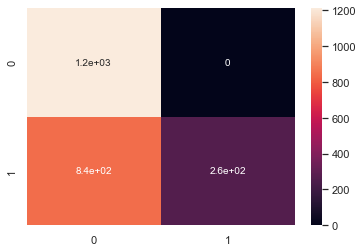

In [149]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [150]:
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6369509043927648


[Text(0.375, 0.875, 'x[1] <= -1.885\ngini = 0.499\nsamples = 6965\nvalue = [3608, 3357]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 247\nvalue = [0, 247]'),
 Text(0.5, 0.625, 'x[1] <= -1.615\ngini = 0.497\nsamples = 6718\nvalue = [3608, 3110]'),
 Text(0.25, 0.375, 'x[1] <= -1.705\ngini = 0.351\nsamples = 705\nvalue = [545, 160]'),
 Text(0.125, 0.125, 'gini = 0.423\nsamples = 524\nvalue = [365, 159]'),
 Text(0.375, 0.125, 'gini = 0.011\nsamples = 181\nvalue = [180, 1]'),
 Text(0.75, 0.375, 'x[1] <= -0.625\ngini = 0.5\nsamples = 6013\nvalue = [3063, 2950]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 499\nvalue = [0, 499]'),
 Text(0.875, 0.125, 'gini = 0.494\nsamples = 5514\nvalue = [3063, 2451]')]

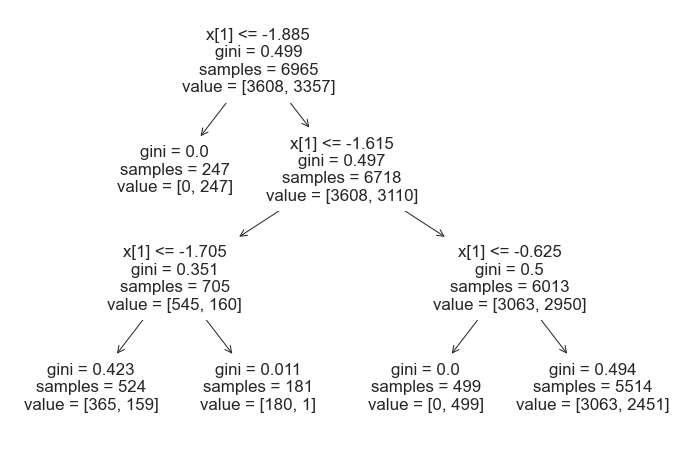

In [151]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(classifier.fit(X_train, y_train)) 

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


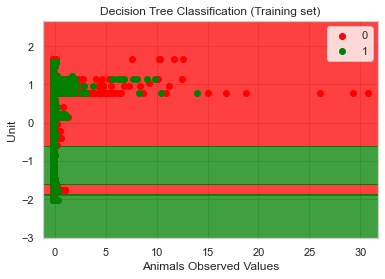

In [152]:
from matplotlib.colors import ListedColormap

# Store the data into X_set and y_set
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Animals Observed Values')
plt.ylabel('Unit')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


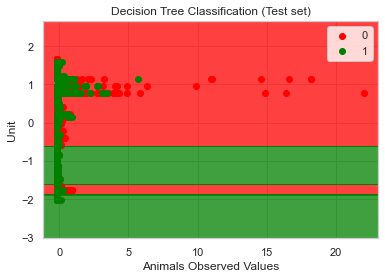

In [153]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Animals Observed Values')
plt.ylabel('Unit')
plt.legend()
plt.show()

# Linear Regression

In [154]:
sns.reset_orig()
%matplotlib inline

In [155]:
# Create a class named as 'LinearRegressionGD'
class LinearRegressionGD(object):
    
    def __init__(self, eta = 0.001, n_iter = 20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [156]:
df[['TIME_PERIOD']]

TIME_PERIOD
0             2015
1             2016
2             2017
3             2018
4             2019
...            ...
10028         2007
10029         2008
10030         2009
10031         2010
10032         2011

[9287 rows x 1 columns]

In [157]:
X = df[['TIME_PERIOD']].values
y = df[['OBS_VALUE']].values

In [158]:
X.shape, y.shape

((9287, 1), (9287, 1))

In [159]:
# Import the library for normalization of the data
from sklearn.preprocessing import StandardScaler

# Initialise the objects using StandardScaler() 
sc_x = StandardScaler()
sc_y = StandardScaler()

# Train the objects using fit_transform()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [160]:
# Reshape the (9287, 1) to (9287,) array for Machine Learning model
y_std = np.reshape(y_std, 9287)

# Display the number of rows and columns
X_std.shape, y_std.shape

((9287, 1), (9287,))

In [161]:
# Initialise an object (lr) using the created function LinearRegressionGD()
lr = LinearRegressionGD()

# Train the model by calling fit() mentiof
lr.fit(X_std, y_std)

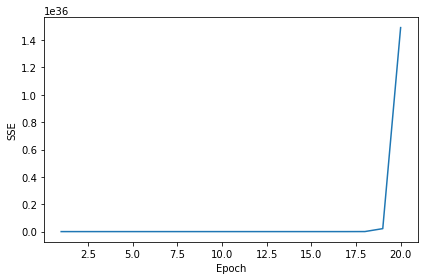

In [162]:
# Draw a plot using linear regression iterations and cost
plt.plot(range(1, lr.n_iter + 1), lr.cost_)
plt.ylabel('SSE')           # SSE means 'sum of squares error'
plt.xlabel('Epoch')         # The number of epochs is a hyperparameter that defines the number times 
                            # that the learning algorithm will work through the entire training 
                            # dataset. One epoch means that each sample in the training dataset has 
                            # had an opportunity to update the internal model parameters. 
                            # An epoch is comprised of one or more batches.
plt.tight_layout()
plt.savefig('cost.png', dpi = 300)
plt.show()

In [163]:
# Method or Function for Linear Regression plot
def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'blue')
    plt.plot(X, model.predict(X), color = 'red', linewidth = 2)    
    return

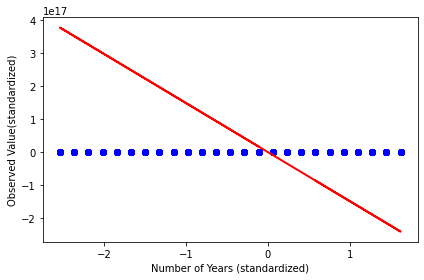

In [164]:
# Call the method lin_regplot()
lin_regplot(X_std, y_std, lr)
plt.xlabel('Number of Years (standardized)')
plt.ylabel('Observed Value(standardized)')
plt.tight_layout()
# plt.savefig('./figures/gradient_fit.png', dpi=300)
plt.show()

In [165]:
# Display the slope and intercept of the line
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: -148511185832893376.000
Intercept: 8553.829


# Estimating coefficient of a regression model via scikit-learn


In [166]:
# import LinearRegression from sklearn library
from sklearn.linear_model import LinearRegression

# Initialise an object named as 'slr' by calling a method LinearRegression()
slr = LinearRegression()

# Train the model
slr.fit(X, y)

# Predict the results
y_pred = slr.predict(X)

# Display the Slope and Intercept values
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 8798.149
Intercept: -17569342.895


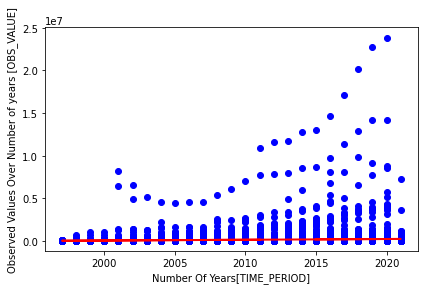

In [167]:
# Display the regression plot using lin_regplot() method
lin_regplot(X, y, slr)
plt.xlabel('Number Of Years[TIME_PERIOD]')
plt.ylabel('Observed Values Over Number of years [OBS_VALUE]')
plt.tight_layout()
# plt.savefig('./figures/scikit_lr_fit.png', dpi=300)
plt.show()

# Fitting a robust regression model using RANSAC

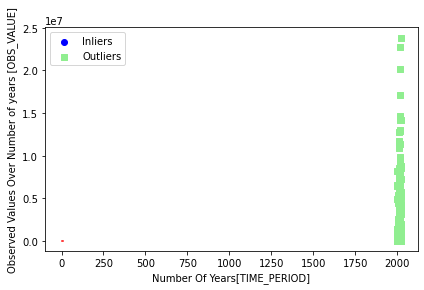

In [168]:
# import RANSACRegressor library
from sklearn.linear_model import RANSACRegressor

# Initialise an object by calling an object RANSACRegressor()
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials = 100, 
                         min_samples = 50,                          
                         residual_threshold = 5.0, 
                         random_state = 0)
ransac.fit(X, y)

# Store the values for inlier and outlier masks
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c = 'blue', marker = 'o', label = 'Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c = 'lightgreen', marker = 's', label = 'Outliers')
plt.plot(line_X, line_y_ransac, color = 'red')   
plt.xlabel('Number Of Years[TIME_PERIOD]')
plt.ylabel('Observed Values Over Number of years [OBS_VALUE]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/ransac_fit.png', dpi=300)
plt.show()

In [169]:
# Display the coefficients and intercepts
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 0.000
Intercept: 105.500


# Evaluating the performance of linear regression models

In [170]:
df.head(2)

DATAFLOW        LAST UPDATE freq animals unit geo  \
0  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100    0  AT   
1  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100    0  AT   

   TIME_PERIOD  OBS_VALUE  Country_code  Animal_code country_name geo_3  
0         2015      15697             0            2      Austria   AUT  
1         2016      18161             0            2      Austria   AUT

In [171]:
df.iloc[:, :-1]

DATAFLOW        LAST UPDATE freq animals unit geo  \
0        ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100    0  AT   
1        ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100    0  AT   
2        ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100    0  AT   
3        ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100    0  AT   
4        ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100    0  AT   
...                         ...                ...  ...     ...  ...  ..   
10028  ESTAT:ORG_LSTSPEC_H(1.0)   13/02/2019 23:00    A   A6710    1  SK   
10029  ESTAT:ORG_LSTSPEC_H(1.0)   13/02/2019 23:00    A   A6710    1  SK   
10030  ESTAT:ORG_LSTSPEC_H(1.0)   13/02/2019 23:00    A   A6710    1  SK   
10031  ESTAT:ORG_LSTSPEC_H(1.0)   13/02/2019 23:00    A   A6710    1  SK   
10032  ESTAT:ORG_LSTSPEC_H(1.0)   13/02/2019 23:00    A   A6710    1  SK   

       TIME_PERIOD  OBS_VALUE  Country_code  Animal_code country_name  
0             2015      15697             0            2      Austria  
1             2016      18161             0            2      Austria  
2             2017      17273             0            2      Austria  
3             2018      17752             0            2      Austria  
4             2019      18678             0            2      Austria  
...            ...        ...           ...          ...          ...  
10028         2007        390            35           39     Slovakia  
10029         2008        345            35           39     Slovakia  
10030         2009        420            35           39     Slovakia  
10031         2010        440            35           39     Slovakia  
10032         2011        448            35           39     Slovakia  

[9287 rows x 11 columns]

In [172]:
df.iloc[:, [4,6,8,9]]

unit  TIME_PERIOD  Country_code  Animal_code
0        0         2015             0            2
1        0         2016             0            2
2        0         2017             0            2
3        0         2018             0            2
4        0         2019             0            2
...    ...          ...           ...          ...
10028    1         2007            35           39
10029    1         2008            35           39
10030    1         2009            35           39
10031    1         2010            35           39
10032    1         2011            35           39

[9287 rows x 4 columns]

In [173]:
# import train_test_split from the library sklearn
from sklearn.model_selection import train_test_split

# Declare a variable named as 'X' and 'y'
X = df.iloc[:, [4,6,8,9]].values               # All features (independent varaibles) except MEDV 
y = df['OBS_VALUE'].values                    # Target variable

# Split the data into 70% and 30% by using a parameter test_size = 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Display the size of the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9287, 4), (9287,), (6500, 4), (2787, 4), (6500,), (2787,))

In [174]:
# Initialise an object slr by calling a method named as 'LinearRegression()'
slr = LinearRegression()

# Trian the model
slr.fit(X_train, y_train)

# Predict the results for the training and testing
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

# Display the values of y_train_pred and y_test_pred
# print(y_train_pred, '\t', y_test_pred)

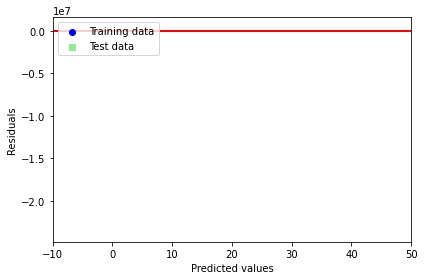

In [175]:
# Display the graph for the training and testing of the data
plt.scatter(y_train_pred,  y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

In [176]:
# Calculate the r2_score and mean squared error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Display the means squared error and r2 score values
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 596362826310.473, test: 697796777873.920
R^2 train: 0.017, test: 0.019


# Ridge Regression


In [177]:
from sklearn.linear_model import Ridge

# Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_train, y_train)

# Display the score by using ridge object
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.02
Test set score: 0.02


In [178]:
# alpha = 10 is a parameter using a fit() method
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.02
Test set score: 0.02


# Lasso Regression

In [179]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.02
Test set score: 0.02
Number of features used: 4


In [180]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.02
Test set score: 0.02
Number of features used: 4


In [181]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.02
Test set score: 0.02
Number of features used: 4


In [182]:
# Its looks like it stays same regardless of increasing default setting of max_iter

# Statistics

In [183]:
from numpy.random import randn
np.random.seed(101)

In [184]:
df.describe()

TIME_PERIOD     OBS_VALUE  Country_code  Animal_code
count  9287.000000  9.287000e+03   9287.000000  9287.000000
mean   2011.661355  1.295525e+05     17.924518    22.413374
std       5.780201  7.989541e+05     11.222152    11.099311
min    1997.000000  0.000000e+00      0.000000     0.000000
25%    2007.000000  5.220000e+02      7.000000    16.000000
50%    2012.000000  5.399000e+03     19.000000    24.000000
75%    2017.000000  3.390250e+04     28.000000    31.000000
max    2021.000000  2.384456e+07     36.000000    41.000000

## Poisson Distribution

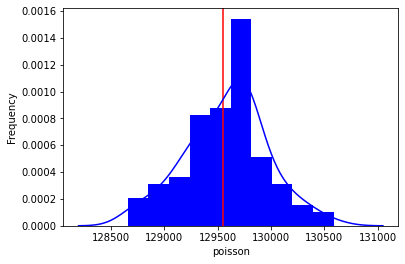

In [185]:
import statistics
from scipy.stats import poisson

x = poisson.rvs(mu =1.295525e+05, size = 101)
plt.axvline(1.295525e+05, color = 'red')
ax = sns.distplot(x, kde= True, color ='blue', hist_kws ={"linewidth":25, 'alpha':1})
ax.set(xlabel='poisson', ylabel='Frequency')
plt.show()

In [186]:
import statistics
statistics.mean(df['OBS_VALUE'])

129552.51889738344

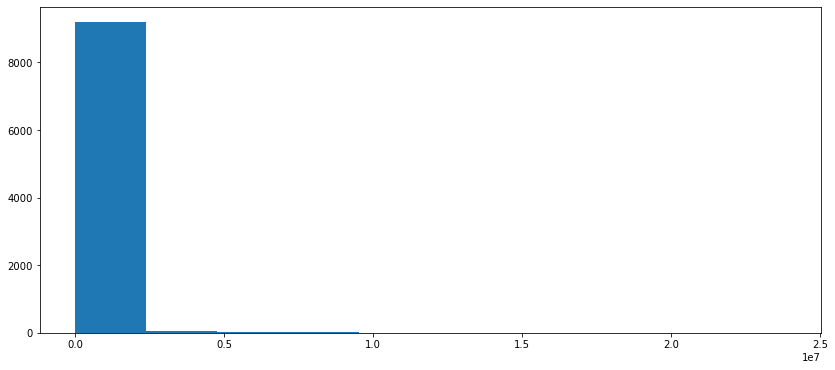

In [187]:
import matplotlib
from matplotlib import pyplot
%matplotlib inline
pyplot.figure(figsize=(14,6))
pyplot.hist(df['OBS_VALUE'])
pyplot.show()

## Shapiro-Wilk Test

In [188]:
#H0: Observed Values are Normally Distributed
#H1:Observed Values are not Normally Distributed
from scipy.stats import shapiro
DataToTest = df['OBS_VALUE']
stat, p =shapiro(DataToTest)
print('stat=%.2f, p=%.30f' % (stat, p))
if p >0.05:
    print('Observed Values are Normally Distributed')
else:
    print('Observed Values are not Normally Distributed')

stat=0.13, p=0.000000000000000000000000000000
Observed Values are not Normally Distributed


In [189]:
#Lets genertae Norammly distributed data for python
from numpy.random import randn
DataToTest = randn(100)

In [190]:
DataToTest

array([ 2.02954418e+00, -1.04635839e+00, -1.30648231e+00, -1.63292400e+00,
        8.02129370e-01, -1.66753678e+00,  6.08857292e-01,  2.86472988e-01,
       -2.05792298e-01,  2.49399019e+00, -5.47259888e-01,  4.96726954e-01,
       -1.23561426e+00, -7.98427961e-01,  7.54121433e-01, -7.72040644e-01,
       -3.44316370e-02,  6.88408424e-01,  8.15233578e-02, -4.15191116e-01,
        5.36614579e-02, -2.11511310e+00, -2.79510215e-01,  1.06271042e+00,
        1.75201442e+00,  6.95546725e-01,  1.53660834e-01,  1.67638244e-01,
       -7.65930075e-01,  9.62299170e-01,  9.02825859e-01, -5.37909157e-01,
       -1.54967110e+00,  4.35252922e-01,  1.25990369e+00, -4.47898352e-01,
        2.66206779e-01,  4.12580161e-01,  9.88772845e-01,  5.13832729e-01,
       -9.28204832e-01,  8.46903898e-01, -2.98435744e-01,  2.91414757e-02,
        8.89030884e-01, -1.83926086e+00,  8.63595602e-01, -1.07659050e+00,
       -5.80382983e-01,  1.20902728e+00,  1.20174403e+00, -8.20463164e-01,
       -1.02957716e+00, -

In [191]:
stat, p =shapiro(DataToTest)
print('stat=%.2f, p=%.30f' % (stat, p))
if p >0.05:
    print('Observed Values are Normally Distributed')
else:
    print('Observed Values are not Normally Distributed')

stat=0.99, p=0.671137869358062744140625000000
Observed Values are Normally Distributed


# ${K^2}$ Normality Test

In [192]:
from scipy.stats import normaltest
DataToTest = df['OBS_VALUE']
stat, p = normaltest(DataToTest)
print('stat=%.10f, p=%.10f' % (stat, p))
if p >0.05:
    print('Observed Values are Normally Distributed')
else:
    print('Observed Values are not Normally Distributed')

stat=17984.3062140504, p=0.0000000000
Observed Values are not Normally Distributed


# Correlation Test-Pearson and Spearman's Rank Correlation
#### Assuming identical and Normal Distribution

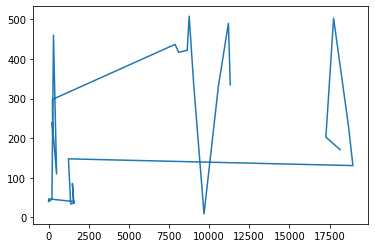

In [194]:
FirstSample = df[1:30]['OBS_VALUE']
SecondSample = df_gbAnimal[1:30]['animals']
ThirdSample = df_Ireland[1:30]['OBS_VALUE']

pyplot.plot(FirstSample, SecondSample)
pyplot.show()

In [195]:
# We just took first 30 records and take 30 records for animal group dataframe and try to see if there is any correlation between both
# and it doesn,t show any clear pattern so we can deduce that variables are not dependent on each other.

In [196]:
#Pearson  Correlation
from scipy.stats import pearsonr
stat, p =pearsonr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat,p))
if p >0.05:
    print('Samples are Independent')
else:
    print('Samples are Dependent')

stat=0.394, p=0.034222
Samples are Dependent


In [197]:
# Spearman Rank Correlation
from scipy.stats import spearmanr
stat, p =spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat,p))
if p >0.05:
    print('Samples are Independent')
else:
    print('Samples are Dependent')

stat=0.336, p=0.074929
Samples are Independent


In [198]:
df[1:30].corr(method="pearson")

TIME_PERIOD  OBS_VALUE  Country_code  Animal_code
TIME_PERIOD      1.000000   0.214169     -0.290163          NaN
OBS_VALUE        0.214169   1.000000     -0.264644          NaN
Country_code    -0.290163  -0.264644      1.000000          NaN
Animal_code           NaN        NaN           NaN          NaN

In [199]:
df.head(5)

DATAFLOW        LAST UPDATE freq animals unit geo  \
0  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100    0  AT   
1  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100    0  AT   
2  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100    0  AT   
3  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100    0  AT   
4  ESTAT:ORG_LSTSPEC(1.0)  02/12/22 23:00:00    A   A1100    0  AT   

   TIME_PERIOD  OBS_VALUE  Country_code  Animal_code country_name geo_3  
0         2015      15697             0            2      Austria   AUT  
1         2016      18161             0            2      Austria   AUT  
2         2017      17273             0            2      Austria   AUT  
3         2018      17752             0            2      Austria   AUT  
4         2019      18678             0            2      Austria   AUT

In [200]:
import numpy as np
print(FirstSample.mean())
print(SecondSample.mean())

6482.379310344828
220.6551724137931


In [201]:
#One Sample T-test
import scipy
scipy.stats.ttest_1samp(FirstSample, 0)


Ttest_1sampResult(statistic=5.186648010388975, pvalue=1.665073036657835e-05)

In [202]:
#One Sample T-test
import scipy
scipy.stats.ttest_1samp(FirstSample, 3000)

Ttest_1sampResult(statistic=2.7863034322283338, pvalue=0.009461961846048205)

In [203]:
#One Sample T-test
import scipy
scipy.stats.ttest_1samp(FirstSample, 6000)

Ttest_1sampResult(statistic=0.38595885406769237, pvalue=0.702444249816434)

In [236]:
#One Sample T-test
import scipy
scipy.stats.ttest_1samp(FirstSample, 7000)

Ttest_1sampResult(statistic=-0.4141560053191881, pvalue=0.6819154277274431)

In [239]:
#One Sample T-test
import scipy
scipy.stats.ttest_1samp(FirstSample, 9000)

Ttest_1sampResult(statistic=-2.014385724092949, pvalue=0.05366547257285221)

In [206]:
# as we can see our mean square is 6482 and we start taking our null hypothesis starting from 0,3000,6000,7000 and all gives us high p value and all are pointing towards rejecting our null hypothesis
# after putting values higher as 9000 its getting closer to 0.05 which mean our null hypothesis is getting significant.

# Independent Sample T-Test

In [207]:
scipy.stats.ttest_ind(FirstSample, SecondSample)

Ttest_indResult(statistic=5.008493051523593, pvalue=5.810429458690967e-06)

In [208]:
# As we can see mean of FirstSample is way too higher than SecondSample, if we look at p value is way too small. so these two obsevations are not related means they are independent variables.   

In [209]:
ttest, p = scipy.stats.f_oneway(FirstSample, SecondSample, ThirdSample)
print('stat=%.3f, p=%5f' % (stat,p))
if p >0.05:
    print('Same distribution of score')
else:
    print('Different distributions of scores')

stat=0.336, p=0.000000
Different distributions of scores


In [210]:
# As it could be seen Our null hypothesis can not be accepted

In [211]:
contingency_df = pd.crosstab(df['animals'], df['geo'], margins= False)

In [212]:
contingency_df

geo               AT  BE  BG  CH  CY  CZ  DE  DK  EE  ES  ...  NL  NO  PL  PT  \
animals                                                   ...                   
A0019              0  13   5  14   1   8   0  13   5   8  ...   1   3   7   0   
A1000              0  13   5  14   1   7   0  13   7   4  ...   6  10   7   8   
A1100              6   7   8   9   6   9   2   9   9   9  ...   0   9   7   7   
A2000             16  22  16  24  11  18  10  22  17  18  ...  24  17  16  18   
A2000B             7   8   9   0   9   9   9   9   9   9  ...   9   0   9   5   
A2000D             0   8   1  11   0   4   0  10   5   2  ...  13   0   4   0   
A2000E             0  12   1  11   0   4   0  12   5   2  ...  13   8   3   0   
A2010              0   3   1   1   0   3   0   1   1   0  ...   8   0   1   0   
A2010B             0   2   0   0   0   1   0   0   1   0  ...   7   0   1   0   
A2010C             0   2   0   0   0   0   0   0   1   0  ...   7   0   1   0   
A2020              0   6   1   1   0   4   0   9   4   0  ...  10   0   1   0   
A2020B             0   2   1   0   0   2   0   0   1   0  ...   7   0   1   0   
A2020C             0   2   0   0   0   2   0   1   1   0  ...   7   0   1   0   
A2030              0   3   1   1   0   3   0   0   1   0  ...   8   0   1   0   
A2030B             0   3   1   1   0   2   0   0   1   0  ...   8   0   1   0   
A2030C             0   3   0   1   0   2   0   1   1   0  ...   8   0   1   0   
A2300F            16  22  12  24  10  17  10  22  17  15  ...  24  19  13   6   
A2300H             6  10   0   1   0   3   0  10   4   0  ...  10   6   1   0   
A2900              7   8   9   0   9   9   9   8   9   9  ...   9   0   7   5   
A3000              7  13   5  14   1   8   0  13   7   8  ...  14  10   7   8   
A3100             10   9  10  10  10  10  10   9  10  10  ...  10   9   9  10   
A3120              9  22  12  23  10  16   3  22  16  11  ...  20  19  13   5   
A3130              7  20  11  23   9  16   1  22  16  11  ...  23  19  12   5   
A3132              9  22  12  23  10  16   0  22  16  11  ...  23  19  13   5   
A4100             17  22  16  24  11  18  10  22  17  18  ...  24  19  16  18   
A4110              8  16  10  23   7  16   2  21   6  14  ...  19   5  12   4   
A4110K             1   0   1   0   0   1   0   0   0   0  ...   1   0   0   0   
A4120              7  17   9  23   7  16   2  21   6  14  ...  19   5  12   4   
A4200             12  22  16  24  11  18   4  20  17  18  ...  24  19  16  18   
A4210              8   9  10  23   7  16   2  20   6  14  ...  20  19  12   4   
A4220              7  11  10  23   7  16   2  17   6  14  ...  20  19  12   4   
A5000             16  22  14  23  10  17   3  22  16  17  ...  20  19  13  17   
A5000X5110O_5140   7   7   8   9   5   9   2   8   8   9  ...   6   9   8   4   
A5110O             8  22  11  23   8  16   2  22  15  15  ...  22  19  15   4   
A5110OH            1   0   1   1   0   1   1   0   1   1  ...   1   0   0   0   
A5140              8  21  11  23   8  16   2  22  14  15  ...  21  19  15   4   
A5200              0  13   3  14   0   7   0  13   6   5  ...  11  10   4   0   
A6110              9  11  11  10   8  13   0   6  10  11  ...   4   9  12   7   
A6111              0   7   3   0   0   2   0   9   4   0  ...   1   6   1   0   
A6710              0   5   6   1   1   6   0   9   7   8  ...   0  10   7   8   
A6710R             6   7   9   0   7   9   0   7   9   9  ...   0   9   8   8   
A6900              6   8   8   9   7   8   0   7   4   4  ...   3   1   7   6   

geo               RO  RS  SE  SI  SK  TR  
animals                                   
A0019              5   0   7   8   7   0  
A1000              6   0   1   7   9   0  
A1100              7   8   0   5   9   6  
A2000             15   8  18  17  18   9  
A2000B             9   7   8   0   9   6  
A2000D             5   0   7   3   9   0  
A2000E             5   0   7   6   9   0  
A2010              3   0   0   3   4   0  
A2010

In [213]:
#As for chi square we supposed to have independent observation, 
#size in each box of contigency table should be graeter than 25 but as we can see its below 25. 
#It will run the code but it results couldn,t be reliable.

In [214]:
from scipy.stats import chi2_contingency

In [215]:
stat, p, dof, expected = chi2_contingency(contingency_df)
print('stat=%.3f, p=%.3f' % (stat,p))
if p >0.05:
    print('Categories are Independent')
else:
    print('Categories are Dependent')

stat=2067.832, p=0.000
Categories are Dependent


In [216]:

#Now with this imaginary or manually table the main and important thing here is p value that is 0.0000
# that is towards the alternative hypothesis and it shows that our categories are dependent on each other so we reject our null hypothesis

In [217]:
import statistics
from scipy.stats import norm
norm.pdf(1, loc = 1.295525e+05, scale=7.989541e+05 )

4.928091574022133e-07

In [218]:
observed = df['animals'].value_counts()
observed

A4100               508
A2000               503
A4200               490
A5000               472
A2300F              460
A3120               437
A3132               422
A3130               417
A5110O              387
A5140               371
A4110               336
A4210               335
A4120               331
A4220               331
A3100               298
A2900               240
A6110               236
A2000B              231
A3000               206
A1100               203
A6710R              201
A5000X5110O_5140    186
A1000               171
A5200               165
A6710               154
A6900               154
A0019               148
A2000E              148
A2000D              131
A2300H              110
A2020                86
A6111                67
A2010                48
A2030                47
A2030C               46
A2020C               40
A2030B               40
A2010C               36
A2020B               36
A2010B               34
A5110OH              16
A4110K          

In [219]:
totalSum = observed.sum()
print(totalSum)

9287


In [220]:
# make dictionary of values
dict = {'A4100' : 0.024,'A2000' : 0.024,'A4200' : 0.024, 'A5000':0.024,'A2300F':0.024,'A3120':0.024,'A3132':0.024,'A3130':0.024,'A5110O':0.024,'A5140':0.024,
'A4110':0.024,'A4120':0.024,'A4210':0.024,'A4220':0.024,'A3100':0.024,'A2900':0.024,'A2000B':0.024,'A6110':0.024,'A3000':0.024,'A1100':0.024,
'A6710R':0.024,'A5000X5110O_5140':0.024,'A5200':0.024,'A1000':0.024,'A6710':0.024,'A0019':0.024,'A2000E':0.024,'A6900':0.024,'A2000D':0.024,'A2300H':0.024,
'A2020':0.024,'A6111':0.024,'A2010':0.024,'A2030':0.024,'A2030C':0.024,'A2020C':0.024,'A2030B':0.024,'A2020B':0.024,'A2010C':0.024,'A2010B':0.024,'A5110OH':0.024,'A4110K':0.024}
   
# create series from dictionary
probabilities = pd.Series(dict)
probabilities

A4100               0.024
A2000               0.024
A4200               0.024
A5000               0.024
A2300F              0.024
A3120               0.024
A3132               0.024
A3130               0.024
A5110O              0.024
A5140               0.024
A4110               0.024
A4120               0.024
A4210               0.024
A4220               0.024
A3100               0.024
A2900               0.024
A2000B              0.024
A6110               0.024
A3000               0.024
A1100               0.024
A6710R              0.024
A5000X5110O_5140    0.024
A5200               0.024
A1000               0.024
A6710               0.024
A0019               0.024
A2000E              0.024
A6900               0.024
A2000D              0.024
A2300H              0.024
A2020               0.024
A6111               0.024
A2010               0.024
A2030               0.024
A2030C              0.024
A2020C              0.024
A2030B              0.024
A2020B              0.024
A2010C      

In [221]:
N = 9287 #sample size
expected = N * probabilities
expected

A4100               222.888
A2000               222.888
A4200               222.888
A5000               222.888
A2300F              222.888
A3120               222.888
A3132               222.888
A3130               222.888
A5110O              222.888
A5140               222.888
A4110               222.888
A4120               222.888
A4210               222.888
A4220               222.888
A3100               222.888
A2900               222.888
A2000B              222.888
A6110               222.888
A3000               222.888
A1100               222.888
A6710R              222.888
A5000X5110O_5140    222.888
A5200               222.888
A1000               222.888
A6710               222.888
A0019               222.888
A2000E              222.888
A6900               222.888
A2000D              222.888
A2300H              222.888
A2020               222.888
A6111               222.888
A2010               222.888
A2030               222.888
A2030C              222.888
A2020C              

In [222]:
observed-expected

A0019               -74.888
A1000               -51.888
A1100               -19.888
A2000               280.112
A2000B                8.112
A2000D              -91.888
A2000E              -74.888
A2010              -174.888
A2010B             -188.888
A2010C             -186.888
A2020              -136.888
A2020B             -186.888
A2020C             -182.888
A2030              -175.888
A2030B             -182.888
A2030C             -176.888
A2300F              237.112
A2300H             -112.888
A2900                17.112
A3000               -16.888
A3100                75.112
A3120               214.112
A3130               194.112
A3132               199.112
A4100               285.112
A4110               113.112
A4110K             -213.888
A4120               108.112
A4200               267.112
A4210               112.112
A4220               108.112
A5000               249.112
A5000X5110O_5140    -36.888
A5110O              164.112
A5110OH            -206.888
A5140               

In [223]:
(observed - expected)**2

A0019                5608.212544
A1000                2692.364544
A1100                 395.532544
A2000               78462.732544
A2000B                 65.804544
A2000D               8443.404544
A2000E               5608.212544
A2010               30585.812544
A2010B              35678.676544
A2010C              34927.124544
A2020               18738.324544
A2020B              34927.124544
A2020C              33448.020544
A2030               30936.588544
A2030B              33448.020544
A2030C              31289.364544
A2300F              56222.100544
A2300H              12743.700544
A2900                 292.820544
A3000                 285.204544
A3100                5641.812544
A3120               45843.948544
A3130               37679.468544
A3132               39645.588544
A4100               81288.852544
A4110               12794.324544
A4110K              45748.076544
A4120               11688.204544
A4200               71348.820544
A4210               12569.100544
A4220     

In [224]:
(observed - expected)**2 / expected

A0019                25.161572
A1000                12.079450
A1100                 1.774580
A2000               352.027622
A2000B                0.295236
A2000D               37.881826
A2000E               25.161572
A2010               137.225030
A2010B              160.074461
A2010C              156.702580
A2020                84.070585
A2020B              156.702580
A2020C              150.066493
A2030               138.798807
A2030B              150.066493
A2030C              140.381557
A2300F              252.243730
A2300H               57.175355
A2900                 1.313756
A3000                 1.279587
A3100                25.312321
A3120               205.681547
A3130               169.051131
A3132               177.872243
A4100               364.707174
A4110                57.402483
A4110K              205.251411
A4120                52.439811
A4200               320.110641
A4210                56.392002
A4220                52.439811
A5000               278.421398
A5000X51

In [225]:
sum((observed - expected)**2/expected)

4592.530018879437

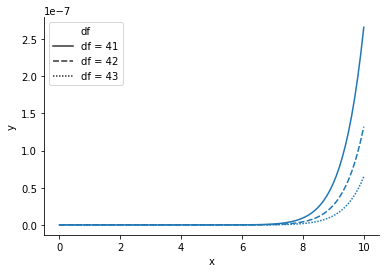

In [226]:
from myst_nb import glue
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import chi2




x = np.linspace(0, 10, 100)

y3 = chi2.pdf(x, df=41)
y4 = chi2.pdf(x, df=42)
y5 = chi2.pdf(x, df=43)
labels = ['df = 41']*len(x) + ['df = 42']*len(x) + ['df = 43']*len(x)
y = list(y3)+list(y4)+list(y5)
x = list(x)*3

df = pd.DataFrame(
    {'y': y,
     'x': x,
     'df': labels
    }) 

fig = sns.lineplot(x= "x", y= "y",
             style="df",
             data=df)

sns.despine()
glue("manychi_fig", fig, display=False)

In [227]:
from scipy.stats import chi2
round(chi2.ppf(0.95, 42),39)

58.12403768086802

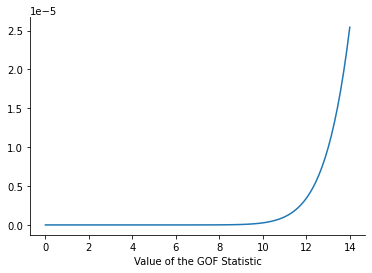

In [228]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import chi2


x = np.linspace(0, 14, 100)

y = chi2.pdf(x, df=41)

df = pd.DataFrame(
    {'y': y,
     'x': x
    }) 

fig = sns.lineplot(x= "x", y= "y",
             data=df)
critical_value = chi2.ppf(0.95, 41)
fig.fill_between(x, 0, y, where = x > critical_value-0.1, color = 'blue', alpha = 0.3)

fig.annotate("The observed value is 5041.122840475717", xy=(5041.122840475717, 0), xytext=(10, 0.12), arrowprops={"arrowstyle":"->", "color":"black"})
fig.annotate("The critical value is 55.75847927888702", xy=(critical_value, 0), xytext=(6, 0.15), arrowprops={"arrowstyle":"->", "color":"black"})
fig.set(xlabel = 'Value of the GOF Statistic', ylabel='')

sns.despine()

glue("goftest-fig", fig, display=False)

In [229]:
#!pip install divergence



${\chi}^2=\sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i}$

In [230]:
from scipy.stats import chi2
round(chi2.ppf(0.95, 41),2)

56.94

So if our χ2 statistic is bigger than 56.94 or so, then we can reject the null hypothesis. Since we actually calculated that before (i.e χ2=4592.53) we know that we can reject the null hypothesis.

# Non Parametric test 1- Mann-whitney U Test whether the distributions of Two or more Independent Samples are equal or not

In [231]:
df_IrelandV = df_Ireland['OBS_VALUE']
df_SwedenV = df_Sweden['OBS_VALUE']

In [232]:
tstat, p = scipy.stats.mannwhitneyu(df_IrelandV, df_SwedenV)
print('stat=%.3f, p=%.3f' % (stat,p))
if p >0.05:
    print('Same Distribution')
else:
    print('Different Distribution')

stat=2067.832, p=0.000
Different Distribution
